# VMC algorithm for Helium Ground State approximation

*Alessandro Cuoghi, Matteo Quinzi, Giacomo Rizzi*

## Abstract

The Helium ground state is evaluated implementing a **Variational Monte Carlo** algorithm and using a **Padé-Jastrow** trial wavefunction.\
The local energy distribution is determined through **Metropolis** Monte Carlo algorithm, sampling states in the configuration  space given by the cartesian coordinates of the two electrons referred to the nucleus reference frame. Reduced mass effects and spin-orbit coubling effects are neglected.\
The computation gives a result of $E_0 \simeq -2.88 \pm 0.04 eV$ that shares good accordance with the experimental datum of $E^{exp} = 2.904 eV$.\
To take care of statistical noise the computation is repeated several times in order to gain stability and to reduce the contribution of outlaiers.\

## Introduction

Variational methods constitute a class of algorithms based on the **variational principle**, that allow to approximate the ground state of a physical system through a family of trial wavefunctions which have a fixed form and depend on a set of parameters. These methods are based on the reasearch of stationary points of a proper functional, that in the wavefunctions representation, is usually given by a multi-dimensional integral. The problem is that such integrals are usually extremely expensive to evaluate.

These methods are particularly helpful when studying the properties of many-body systems, where the interaction potential between particles may be treated with a **mean field** approximation or the trial wavefunction may be chosen as a product or a linear combination of one-particle wavefunctions.\
Examples of these procedures are given by the **Hartree-Fock** method used to determine the electronic ground state of a many-body system, or the **denisty matrix** approach in condensed matter physics, based on the **Kohn-Sham equations**.  

In computational physics, Variational Monte Carlo (VMC) methods evaluate numerically the multi dimensional integral, based on a Monte Carlo random number generation procedure. This approach has the relevant consequence that the functional can be evaluated with reduced computational costs, while the accuracy of the calculation, as in every other variational method implementation, is determined by the trial wavefunction choice.   

The aim of this project is to determine an approximation of the Helium ground state by implementing a minimization procedure for a two-bodies system based on a VMC method.

## Description of the physical system and selected algorithms

VMC method is based upon the minimization of the energy functional of a quantum many body system, defined for a state $|\psi\rangle$ as the expectation value of the system Hamiltonian $\hat{H}$ on the state $|\psi\rangle$, normalized by the state squared norm : 

\begin{equation}
    E[\psi] = \frac{\langle \psi | \hat{H} |\psi \rangle}{\langle\psi|\psi\rangle}.
\end{equation}

The variational principle ensures that this functional has a **minimum** when the state $|\psi\rangle$ lives in the eigenspace spanned by the system **ground state** $|\phi_0\rangle$, that is taken here to be non-degenrate. The ground state of the system can then be approximated by the implementation of a proper minimization procedure.

For the Helium atom, if we neglect all interaction terms due to spin effects, the Hamiltonian is given in atomic units ($\hbar = 1, a_0 = 1, 4\pi\epsilon_0 = 1, e=1$) by  
\begin{equation}
  \hat{H} = -\frac{1}{2}\nabla_1^2 -\frac{1}{2}\nabla_2^2 - \frac{2}{r_1} - \frac{2}{r_2} + \frac{1}{r_{12}},
\end{equation}
where $r_{12} = |\vec{r_1} - \vec{r_2}|$.

If we consider a family of trial wavefunctions $\psi(\boldsymbol{r};\boldsymbol{\alpha})$ (here $\boldsymbol{r}$ stands for both the electrons coordinates vectors $\boldsymbol{r_1}$ and $\boldsymbol{r_2}$) depending on a set of parameters $\boldsymbol{\alpha}$, then the energy functional con be written as a function of $\boldsymbol{\alpha}$. The minimization procedure is reduced in this case to search the set of parameters $\boldsymbol{\alpha}$ that minimizes $E[\psi;\boldsymbol{\alpha}]$.
Rewritten in terms of wavefunctions the energy functional reads :

\begin{equation}
  E[\psi;\boldsymbol{\alpha}] = \frac{\int\,d\boldsymbol{r}\, \psi^*(\boldsymbol{r};\boldsymbol{\alpha}) \hat{H} \psi(\boldsymbol{r};\boldsymbol{\alpha})}{\int d\boldsymbol{r}\, \psi^*(\boldsymbol{r};\boldsymbol{\alpha}) \psi(\boldsymbol{r}; \boldsymbol{\alpha})} = \frac{\int\,d\boldsymbol{r}\, \psi^*(\boldsymbol{r};\boldsymbol{\alpha}) \hat{H} \psi(\boldsymbol{r};\boldsymbol{\alpha})}{\int \, d\boldsymbol{r}\, |\psi(\boldsymbol{r};\boldsymbol{\alpha})|^2}.
\end{equation}

Now if the local energy $E_L$ of the system is defined as 

\begin{equation}
  E_L(\boldsymbol{r};\boldsymbol{\alpha}) = \frac{\hat{H}\psi(\boldsymbol{r};\boldsymbol{\alpha})}{\psi(\boldsymbol{r};\boldsymbol{\alpha})},
\end{equation}

and a weight function $w$ is defined as 

\begin{equation}
  w(\boldsymbol{r};\boldsymbol{\alpha}) = \frac{|\psi(\boldsymbol{r};\boldsymbol{\alpha})|^2}{\int \, d\boldsymbol{r} \, |\psi(\boldsymbol{r};\boldsymbol{\alpha})|^2},
\end{equation}

the energy functional can be rewritten as the **mean value** of the local energy $E_L$, distributed by the weight function $w$ :

\begin{equation}
  E[\psi;\boldsymbol{\alpha}] = \int \, d\boldsymbol{r}\, w(\boldsymbol{r};\boldsymbol{\alpha}) E_L(\boldsymbol{r}; \boldsymbol{\alpha}).
\end{equation}

Here the VMC method is used to determine numerically the last integral. Notice that in three dimensional (3D) space the local energy of a many body system of $N$ particle will depend on $3N$ cartesian coordinates, thus revealing the importance of a VMC implementation in order to reduce computational costs.\
For the Helium atom the ground state energy has been experimentally measured to be $E_0^{exp} = -2.904 eV$.

### Monte Carlo Metropolis
The mean value of $E_L$ is determined using **Monte Carlo Metropolis** algorithm. If the state of the system is described by a set of generalized coordinates $q$ (in this situation they are actually the two electrons cartesian coordinates) and the states are distributed with a weight function $W(q)$, Metropolis algorithm allows to sample the system states with the asymptotic distribution given by $W$. Thanks to this sampling, Metropolis algorithm allows to evaluate the mean value of irregular functions as well, as long as the weight function $W$ is a regular one.\
The idea is to generate a Markov chain of states  starting from an initial state of coordinates $\boldsymbol{q_o}$. At each step one of the coordinates $q_i$ is randomly chosen and then randomly displaced. The displacement takes place in an interval $[-d,d]$ and can be performed by extracting a random number $\epsilon$ in the interval $[0,1)$ and then displacing the i-th coordinate of a quantity $\Delta q_i = d(2\epsilon - 1)$, so that $\boldsymbol{q_{new}} = (q_1, ..., q_i + \Delta q_i, ... , q_N)$.\
Then the probability $P_{new} = W(\boldsymbol{q_{new}})$ is used to evaluate the ratio $A = P_{new}/P_{old}$ that describes the probability that the new state generated by the Metropolis is more likely to be sampled than the previous one. Here another random number $\zeta$ is randomly extracted in the interval $[0,1)$. If $A > \zeta$ then the move is accepted and the displaced state is taken as a new state of the chain, otherwise it is rejected and the old state of the chain is repeated on the chain.\
If the algorithm starts in a state described by $\boldsymbol{q_0}$ it may take a certain number of moves before the sampled states are distributed with $W$, so as a rule of thumb an **equilibration run** should always be considered to avoid sampling states with unbalanced distributions.\
In this algorithm we can also define the acceptance ratio as the ratio of accepted moves with respect to the total number of moves. Typycal values of the acceptance ratio are generally smaller than $0.5$ and may depend on the system or the chosen weight function.\
It should be stressed that, as the Metropolis algorithm works with ratios of the weight function evaluated on different states, it is unimportant to have a normalized weight function.


### Golden Section Search
After the energy functional $E(\boldsymbol{\alpha})$ has been evaluated as the mean value of the local energy $E_L$ an optimization procedure must be implemented to find the value of $\boldsymbol{\alpha}$ that minimizes the functional. This is due by using a **Golden Section Search** algorithm; this algorithm works with 1D scalar functions, so it will be necessary to write the energy functional as a scalar function $E_L(\alpha)$ of just one variable.\
Once the minimum has been individuated to lie within a certain interval $(a,b)$ in parameter space, the scalar function is evaluated on the interval boundaries and on an inner point $c$ such that the ratio $d_{cb}/d_{ac}$ (here $d_{cb} = |c - b|$ is the distance between the two points on the interval) equals the golden ratio $\varphi \simeq 1.618...$\
Then another point $d$ between $c$ and $b$ (the largest subinterval) is chosen such to respect again the golden section rule in the interval $(c,b)$ and the scalar function $E(\alpha)$ is evaluated on that point. If $E(d)$ is greater than $E(c)$ then the minimum is assumed to lie in the interval $(a,d)$, otherwise the minimum is assumed to lie in $(c,b)$. After this step, the iterative procedure repeats on the newly defined interval until the interval width falls under a certain tolerance.\
A variation of this algorithm is given by the **Brent** algorithm, where the convergence is speed up by the use of parabolic interpolation.

### Task A

In Task A the Helium ground state is approximated using as a trial wavefunction the product of two Hydrogen wavefunctions for the single electrons.\
The trial wavefunction depends on the variational parameter $Z$ that represents the effective nuclear charge felt by each electron.

\begin{equation}
  \psi(\boldsymbol{r};Z) = exp(-Z\,r_1)\,exp(-Z\,r_2)
\end{equation}

Notice that in the ground state the electrons should share the same orbital state with opposite spins. As the antisymmetric part of the wavefunction is granted by the opposite spins sign, and spin effects are neglected in the Hamiltonian, it is perfectly reasonable to consider only an orbital symmetric wavefunction.\\
If the repulsive interelectronic term is neglected, then the minimum value of the functional is given by $E = 4eV$ and is obtained for $Z = 2$.\
If the term is considered the minimum value of the functional is obtained for $Z = 27/16 = 1.6875$ and amounts to $E = -2.8477 eV$. This analytical results will be verified numerically through a VMC implementation.\
In this case the analytic formula of the functional is given by :

\begin{equation}
  E(Z) = - 2^2 + (Z - 2) \Bigg(  \frac{1}{r_1} + \frac{1}{r_2} \Bigg) + \frac{1}{r_{12}}.
\end{equation}

Notice that in the non interacting case there is no $r_{12}$ term and the functional can also be analytically minimized by requiring that there are no divergences for $|r_1| \rightarrow 0$ and $|r_2| \rightarrow 0$. Thus is readily obtained by choosing $Z = 2$ so that the divergences introduced by the kinetic term cancels out the divergences introduced by the potential one. This way of canceling out divergences between terms of opposite sign is referred to as **cusp condition** imposition and will be extremely important in the following task to reduce the number of variational parameters.

### Task B 

A better *ansatz* is given by multiplying the previous wavefunction for the Jastrow exponential correlation factor, with a Padé approximant $p(x) = 1/(1 + bx)$ as exponent. The trial Padé-Jastrow wavefunction is so defined as 
\begin{equation}
  \psi(\boldsymbol{r};Z,a,b) = exp(-Z\,r_1) \, exp(-Z\,r2) \, exp(ax\,/\,(1+bx)) .
\end{equation}

The analytic derivation of the local energy gives 

\begin{equation}
  \begin{split}
  E(Z,a,b) = &- Z^2 + \frac{(Z-2)}{r_1} + \frac{(Z-2)}{r_2} + \frac{1}{r_{12}}\Bigg[ 1 - \frac{2a}{(1 + br_{12})^2}\Bigg] + \\
             &+ \frac{2ba}{(1 + br{12})^3} - \frac{a^2}{(1 + br_{12})^4} + \\
             &+ \frac{Za}{(1 + br_{12})^2} \,\,(\hat{r_{12}} \cdot (\hat{r_1} - \hat{r_2})),
  \end{split}
\end{equation}

where $\hat{r}$ represents the normalized unitary vector. 
By imposing **cusp conditions** on this equation parameters $Z$ and $a$ are fixed as $Z=2$ and $a=0.5$, thus leaving $b$ as the only free variational parameter.\
Again the energy functional is now written as a scalar function of only one variable $b$ as $E(b; Z=2, a=0.5)$.\
By studying the asymptotic limits of the Padé approximant it can be seen that $p(x = 0) = 0$ and $p(x \rightarrow \infty) \rightarrow 1/b$ so that it is meaningful looking for values of $b$ inside the interval $[0,1]$.\
As the parameter $b$ is found at the denominator of the fraction, the smaller $b$ the more the configurations where the two electrons are near are discouraged.

## Code developed -  HeVMC.py module

The code contained into HeVMC module is a collection of functions and a couple of classes used to implement an algorithm that computes the energy functional of the system and tries to minimize it through a reasonable minimization procedure.
While the source code is internally commented, listing input and output parameters, the working mechanism of some relevant functions is explained in the following sections.\
Object oriented python approach is exploited to produce a more flexible code where newly defined objects and functions can be passed as arguments to other functions.\
Finally python packages as `numpy` and `scipy` are used to perform fully optimized array operations and minimization procedures.

### `metropolis` function

The following is the **core function** responsible for the sampling of the local energy values, implementing the Monte Carlo Metropolis procedure previously defined.

Its arguments are : 
- **steps** : integer; number of steps to consider in the metropolis algorithm.
- **init_point** : 1-dimensional array; containing the coordinates of the initial state in the configuration space.
- **d** : float; defines the half width of the interval for the virtual displacements in Metropolis algorithm.
- **weight** : function object; function representing the asymptotic probability distribution.

Its outputs are :
- **chain** : 2-dimensional array; the rows contains the states sampled by the Metropolis algorithm, while each column refers to a particular coordinate in configuration space. This choice is based on `numpy` standard convention of using the first index to label the rows of a multi dimensional array.
- **acceptance_ratio** : float; its the ratio of accepted moves in Metropolis, with respect to the total steps made.

```python
def metropolis(steps, init_point, d, weight):
    dim = len(init_point)
    chain = np.empty((steps+1,dim))
    chain[0] = init_point
    
    #All random extraction are computed in advance 
    nu = rd.randint(low=0, high=dim, size=steps+1)
    disp = rd.uniform(0.,1.,size=steps+1)
    acc_rates = rd.uniform(0.,1.,size=steps+1)
    
    #Evolving chain 
    old_prob = weight(init_point)
    count = 0 
    
    for k in range(1,steps+1):
        # only a coordinate at a time is varied 
        chain[k,:] = chain[k-1,:].copy()
        chain[k,nu[k]] += d * (2.* disp[k] - 1.)
        
        new_prob = weight(chain[k,:]) 
        
        if (new_prob/old_prob) >= acc_rates[k]:
            count += 1 
            old_prob = new_prob 
        else :
            chain[k,nu[k]] = chain[k-1,nu[k]].copy()
        
        #compute acceptance ratio 
        acceptance_ratio = count / steps 
    return chain, acceptance_ratio
```
<caption> Listing 1 : Metropolis algorithm implementation </caption>

To improve efficiency all random extractions, used to choose which generalized coordinate to change and to evaluate the acceptability of the moves are extracted in advance. At each step only one of the generalized variables is randomly selected and then randomly displaced in parameters space. Then  the function `weight` is evaluated over the new state defining the variable `new_prob`, while the variable `old_prob` contains the value of `weight` evaluated on the former state. If the ratio of `new_prob` and `old_prob` is bigger than a value randomly extracted in the interval $[0,1)$ the move is accepted and taken, otherwise the move is reversed to the preceding state.\
Note that the upper bound of the interval $[0,1)$ is excluded just for numerical reasons based on the working of random numbers generators.\
It is also advised to save at each step the probability of obtaining the random state (`old_prob = new_prob`), instead of recomputing it: this reduces computational costs of about a half when calling `metropolis` with expensive weight functions.\
The acceptance ratio of the chain is also returned if the user wants to perform a further statistical analysis.

This function can be used with a generic system as it just needs the variable `init_point` to determine the dimension of the generalized coordinates space and an arbitrary `weight` function to evaluate acceptance probability at each step.\
The user should ensure that the weight function can properly work when an array variable like `init_point` is passed into it.

### `MarkovChain` class 

A Markov chain is built up as a class to evolve the system in the configuration space through Monte Carlo Metropolis algorithm.

In general this object can be defined through:
- **_init_point** : the starting point of the chain, passed as an array. This will determine the dimension of the configuration space.
- **_prob_dist** : the asymptotic probability distribution of the chain, passed as a function object.
- **_d** : the half width virtual displacement in the configuration space.

The initial underscore is based on python convention about how to warn the user about a "private" variable inside a class.

The class contains two methods :

The method **set_chain** initializes the Markov chain as an array whose rows are given by the number of steps required (plus the initial state) and whose columns store the configuration space parameters that describe the system at each step.

The method **evolve_chain** is then used to evolve the Markov Chain in configuration space using `metropolis` function.  If the parameter **save** is set to **True** then `init_point` is substitued by the last point of the chain : this is useful when considering a first run used only to **equilibrate** the chain.\
The extended code describing  the class may be found in appendix **A**.

### `Helium` class

The Helium class contains all the code needed to describe a Helium system in this project.\
An Helium instance is initialized by passing the variational parameters $Z$ and $b$ used to define the trial wavefunctions.\
Other optional parameters are :
- **coords** : define the coordinates of the two electrons in an orthogonal cartesian reference frame centered on the nucleus.
- **interacting** : boolean parameter, used to consider the interaction potential term in the Hamiltonian (`True`) or neglect it (`False`).
- **jastrow** : boolean parameter, used to choose between the Padé-Jastrow trial wavefunction (`True`) or the simpler wavefunction given by the product of two one-electron systems.
- **numeric** : boolean parameter used to select either a numeric calculation of the laplacian,for the local, or an implementation using the anlytic formula. 
It is stressed here that the numeric implementation of the Laplacian, while increasing computational costs, can be used to generalize the algorithm to other trial wavefunctions. 

The class contains a series of methods used to define the Helium electrons wavefunction, the Helium system potential, local energy and the weight function used for Metropolis algorithm. All these functions are defined when initializing the Helium instance. They are set up using the variational and boolean parameters chosen and stored as instance attributes.\
The reader is referred to Appendix **A** for a detailed description of the Helium class internal methods.

The attributes of the Helium class, except the ones that shares the name of the arguments passed to Helium when creating an instance and that have the same meaning, are :
- **V** : function calculating the potential, given an array containing the electrons coordinates. It may be interacting or not depeding on the value of `interacting` parameter. The function works for multi-dimensional array of coordinates passed as argument. If a 1-dimensional array is used, then this must have an explicit shape defining the numer of rows and columns (e.g. (1,n) dimensional array). 
- **WF** : function computing the wavefunction of the system given an array of electrons coordinates. Depending on the value of `jastrow` parameter, it may be the Padé-Jatrow trial wavefunction or the simpler product of two one-electron wavefunctions. This function works with common 1 dimensional arrays.
- **weight** : function computing the weight distribution for the local energy. This works with common 1 dimensional arrays. It is obtained by taking the square of the wavefunction WF.
- **EL** : function evaluating the local energy of the system given a multi-dimensional array of coordinates. If `numeric == True` the laplacian is computed numerically. Otherwise the form of EL will vary depending on the combination of the parameters `jastrow` and `interacting`. As explained for **V** if 1 dimensional array are passed as arguments, then their shape must be explicit.


Here the difference between the explicit form of the coordinates arrays to be passed to these functions is due to different usage of these attributes : while the `weight` function is usually used in metropolis algorithm to evaluate if a move is accepted or not and works fine with common 1-dimensional arrays, `EL` and `V` are usually used to evaluate the local energy for multiple states at once and their implementation demands an explicit check of the dimension of the array (it is assumed that in a multi-dimensional array each row describes a state and each column contains a specific cartesian coordinate).


### `evaluate_energy` function

The function evaluate_energy returns the estimed best value of the energy functional given a weight distribution and a local energy function.

Its arguments are : 
- **weight** : the weight distribution passed as a python function.
- **EL** : local energy function passed as a python function.
- **p0** : initial point for Metropolis algorithm in configuration space.
- **steps** : number of steps for the equilibration run of the metropolis algorithm. The actual run of the Metropolis (the one used to store the configuration space states) has 10 times the number of steps passed as argument.
- **d** : half width of virtual displacements interval in Metropolis algorithm.
- **method** : string, can be 'bootstrap' or 'split'. This defines which statistical method is used to evaluate the best value of the energy and the error associated.
- **samples** : number of samples used in the `bootstrap` or `split` statistical analysis.
- **talky** : boolean parameter. If `True` summary statistics containing informations about the time spent in the various sections of the function and the statistical error are printed on the standard output. 
- **save_chain** : boolean parameter. If `True`, the Markov Chain determined by the function is returned as an additional output. 

Its outputs are: 
- **best_energy** : the best value for the functional; it is evaluated as the average of the mean values distribution.
- **energy_err** : error on the functional value returned; if bootstrap analysis is performed it is the 95% C.I. of the mean values distribution, otherwise it is the standard deviation.
- **acceptance_ratio** : Markov Chain acceptance ratio;


The function `evaluate_energy` defines a `MarkovChain` instance and uses it to evaluate the local energy on each state.
```python
    r6 = MarkovChain(init_point=p0, prob_dist = weight, d = d) #Markov Chain instance
    r6.set_chain(steps)                                        
    
    #equilibration
    tic = process_time()
    r6.evolve_chain(save=True)
    toc = process_time()
    eq_time = toc - tic
    
    #actual run
    tic = process_time()
    r6.set_chain(10*steps)
    r6.evolve_chain()
    toc = process_time()
    ac_time = toc - tic
    
    #evaluating energy on sampled states
    tic = process_time()
    energies = EL(r6.chain)
    toc = process_time()
    en_time = toc-tic
```
<caption>Listing 2: `evaluate_energy` uses a MarkovChain instance to sample states with a MC Metropolis algorithm. Energies are then evaluated all at once on each state sampled by metropolis.</caption>


If `'bootsrap'` is selected then the Markov Chain obtained from `metropolis` is randomly resampled to obtain other chains of the same length. This is done by calling the function `bootsrap_rep` described in detail in appendix **B**. Then the average energy of each chain is computed and the best energy is evaluated as the mean of the average energy distribution. The error is taken as the half width of the 95 % Confidence Interval (C.I.) of the distribution. Usually the distribution of average energies obtained from a bootstrap algorithm is consistently gaussian.\
If `'split'` is selected then the Markov Chain is split into subchains and the mean energy is computed on each one of this. This is done by the function `make_stats` described in detail into appendix **B**. The best energy is then defined as the mean value of the distribution and the error is taken as the standard deviation of the distribution. If the length of the subchains is too short the mean energies distributions may be influenced by statistical noise.

```python
    #evaluating the functional as a mean value
    tic = process_time()
    if (method.lower() == 'bootstrap') :
        #Bootstrapping
        mean_energies = np.empty(samples)
        #Computing Average energies from bootstrap 
        for i in range(samples):
            mean_energies[i] = bootstrap_rep(energies, np.mean)
        #Taking the mean of the average energies
        best_energy = np.mean(mean_energies)
        percs = np.percentile(mean_energies, [2.5,97.5])
        energy_err = np.abs(percs[0] - percs[1])
     
    elif (method.lower() == 'split') :
        #Splitting MarkovChain in subchains
        best_energy, energy_err, mean_energies = make_stats(energies, samples, array=True)
    else :
        print('Invalid method: you should use bootstrap or split !!!')
        return None
    toc = process_time()
    
    return best_energy, energy_err, r6.acceptance_ratio
```
<caption>Listing 3: This section of `evaluate energy` is responsible for the statistical anlysis procedure.</caption>

The best value of the energy and its uncertainty are then returned, together with the acceptance ratio of the chain.

### `optimize_He_ds` function

This function permforms a direct search in parameters space to look for the parameters values that minimize the Energy functional. This implementation is strictly referred to a Helium system and  may not be generalized to other relevant physical systems.

Its arguments are : 
- **Z** : 1-dimensional array with variational parameter Z values. 
- **b** : 1-dimensional array with variational parameter b values. The user must ensure that Z and b are actually same length arrays.
- **He** : Helium object representing the system. It contains all the information needed about the interacting **e-e** potential and the trial wave function considered.
- **info**  : if `True` error analysis is printed out for each run.
- **energy_args** : this optional parameter is a dictionary of key-word arguments to pass to `evaluate_energy` function. This is thought to be used for fine tuning the internal parameters passed to `metropolis` function without passing all the needed arguments singularly.

The following block of code shows how the key-word arguments are passed to `evaluate_energy`.

```python
for i in range(len(Z)):
        He.Z , He.b = Z[i], b[i]
        He.reconfig(He._interacting, He._jastrow)
    #check if there are energy_args to pass 
    #into evaluate energy for fine_tuning
    if (type(energy_args).__name__ == 'dict'):
            energies[i], errors[i], _ = evaluate_energy(He.weight, He.EL, He.coords,
                                                        talky=info, **energy_args)
    #if there are not, use default values
    else :
            energies[i], errors[i], _ = evaluate_energy(He.weight, He.EL, He.coords,
                                                        talky=info)
```
<caption>Listing 4 : Example of how key-word arguments are passed with the ** operator and a dictionary object.</caption>

The `args` type check is mandatory to avoid malfunctioning as its reference value is set to `None`.\
The `_` are also used to store values that are not strictly needed for `optimize_He_ds`.

Its ouputs are : 
- **best_param**: returns the parameters minimizing the energy as a tuple.
- **best_energy**: returns the minimum value of the energy.
- **energies** : returns the value of energies evaluated on each point.
- **errors** : Contains the error evaluated at each iteration.

The function simply uses the `reconfig` method of the Helium instance passed as arguments to evaluate the weight function and the local energy function of the energy functional at each step. Then local energy is evaluated as an average value using the Metropolis algorithm.\
It is important to stress that this function returns the parameters that minimize the functional **within the set of parameters passed as arguments**. While this procedure may be efficient to verify the correctness of the algorithm for known case-studies, it becomes rapidly unsatisfying when the optimum variational parameter is not known in advance. 



### `optimize_He_gss` function

This function allows to minimize the energy functional varying **only one** variational parameter.\
The code implements a **golden section search** algorithm using the [scipy](https://scipy.org) function [`minimize_scalar`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html). The idea behind this algorithm is to investigate a given interval looking for the energy functional minimum : the interval is divided at each step into two subintervals whose ratio is given by the golden section number; evaluating the functional on the subintervals extrema allows to select one out of them and to reiterate the procedure.\
As the local energy for this system is subject to consistent fluctuations the results of this function may not be stable.

Between the methods offered by scipy (`'Golden'`, implementing a classic golden section search; `'Brent'`, speeding up convergence using parabolyc interpolation; `'Bounded'`, assuring convergence in the given interval), the `'Bounded'` method is chosen. This is due to the possibility of the other methods of converging outside the interval initially given , thus leading to physically rejectable values. Moreover the chosen method recurs to the Brent algorithm when possible to speed up convergence too.  

The function arguments are : 
- **He** : Helium instance containing all the information about the system.
- **b_or_z** : is a character (either `b` or `z`) that describes which parameter is varied and which is kept fixed.
- **interval** : tuple of points representing the boundaries of the interval where the minimum is searched.
- **info** : if `True` the results of the error analysis are printed out at each step. 
- **energy_args** : dictionary of key-word arguments that can be passed to evaluate_energy function for fine-tuning.
- **tol** : tolerance for the convergence algorithm. It must be intended as absolute tolerance for the 'bounded' algorithm. 
- **maxit** : maximum number of iterations in the convergence procedure.
- **display** : if True a feedback message on convergence success is printed out at the end of the golden section search algorithm.

The outputs are :
- **best_param** : contains the value of the parameter that minimizes the functional.
- **optimize_results** : a scipy.optimize `OptimizeResults` class instance containing informations about the convergence of the golden section method. A detailed description of its attributes and methods is given by [scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

As `minimize_scalar` works only with scalar functions, another function `energy_1D` is defined and passed to the former one. 

```python
def energy_1D(x, He, b_or_z='b', info=False, args=None):
    if b_or_z == 'b':
        He.b = x
    elif b_or_z == 'z':
        He.Z = x
    else :
        print('Invalid input:\nyou should put b or z as a string')
        return None
    He.reconfig(He._interacting, He._jastrow)
    
    if (type(args).__name__ == 'dict'):
        energy, _, _ = evaluate_energy(He.weight, He.EL, He.coords,
                                       talky=info, **args)
    else :
        energy, _, _ = evaluate_energy(He.weight, He.EL, He.coords,
                                       talky=info)
    return energy
```
<caption>Listing 5: `energy_1D` function allows to evaluate the energy functional as a scalar function of one of the variational paramets (either b or Z). The parameter `b_or_z` allows to choose which parameter is being varied. The function finally returns the best value of the energy functional.</caption>

This way `minimize_He_gss`  can minimize the energy functional both varying $b$ or $Z$ through the input parameter `b_or_z`. Finally `energy_1D` is passed as argument into `minimize_scalar`. 

```python
def optimize_He_gss(He, b_or_z, interval, 
                    info = False, energy_args=None,
                    tol=1e-4, maxit=50, display=False):
    
    #define arguments to pass to energy_1d
    if (type(energy_args).__name__ == 'dict'):
        args = (He, b_or_z, info, energy_args)
    else :
        args = (He, b_or_z, info)

    #define convergence algorithm options
    opts = {'maxiter' : maxit,
            'disp':display,
            'xatol' :tol
           }
    
    #call scipy function minimize_scalar
    #for detailed explanation look at 
    #https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalarhtml#scipy.optimize.minimize_scalar
    optimize_results = minimize_scalar(energy_1D, args=args, tol=None,
                                 bounds=interval, method='bounded',
                                 options=opts)
    best_param = optimize_results.x
    return best_param, optimize_results
```
<caption>Listing 6: `optimize_He_gss` function works mainly as an interface for callin `minimize_scalar` scipy function. Here the optimization method is fixed to be `bounded`. Notice that for a correct working of the `bounded` method the tolerance must explicitly be passed as absolute tolerance with the key value `xatol` in `opts` dictionary.</caption>

## Code - Algorithm implementation 

The python script `minimize_He_VMC.py` contains an implementation of the code contained in the python module `HeVMC.py`.\
The script, reading input data from a text file `He_VMC_input.txt`, returns an estime of the minimum value of the energy functional for the desired configuration, the values of the variational parameters where the minimum occured and the uncertainties about the energy and parameters values.\
The code allows to compute the minimum of the energy functional (in a selected interval of variational parameters) both for the trial wavefunciton given by 
$$\psi(r_1,r_2;Z) = e^{-Z r_1} e^{-Z r_2},$$
and for the Padé-Jastrow wavefunction given by 
$$\psi(r_1,r_2;b) = e^{-Z r_1} e^{-Z r_2} e^{\frac{\alpha r_{12}}{1 + b r_{12}}}.$$
This is due by a proper choice of input data into the input file.

As the the value of the energy functional may vary depending on statistical fluctuations, in this implementation a direct search is repeated many times on an initial parameters interval and the resulting values are then mediated to reduce statistical noise.\
Then the interval is reduced into a subinterval containing both the minimum value sampled for the energy functional, both the minimum value sampled for the statistical uncertainty, as the minimum of the functional has also the property of minimizing the statistical error.\
Finally a golden section search is performed many times to find the minimum in the shrinked interval. Again many runs allow to reduce statistical noise as the golden section results may vary depending on fluctuations in the evaluation of the functional.\
The best value for the variational parameter is then given by the **median** of the resulting golden section search values. This is mainly due to the median being less influenced by outliers with respect to the mean.\
Finally the energy functional is evaluated  with the best parameter value. Again the value returned for the functional may vary depending on the particular run, so the evaluation is repeated many times and then mediated.\
In an output file are saved the best value of the variational parameter, the best value for the energy functional and the error associated to the energy functional, togheter with the acceptance ratio of the metropolis algorithm as obtained in its last call.


### Input data

The script `minimize_He_VMC.py` reads the data from the file `He_VMC_input.txt`.
All boolean data must be passed either with $0$ (`False`) or $1$ (`True`).

On the third row the user can insert the parameters describing the Helium system to study : 
- **interacting** : boolean determining if the **e-e** interaction term in the potential is used. If `True` then the interaction term is  considered.
- **jastrow** : boolean determining which trial wavefunction to use. If `True` then Padé-Jastrow approximant is used.
- **numeric** : boolean determining if the local energy is evaluated numerically or using the analytic formula. If `True` then numeric implementation is considered.

On the seventh row there are the parameters used in Metropolis algorithm :
- **steps** : integer determinining the number of states sampled by the `metropolis` function. In this implementation a first equilibration run is executed with the value present into `steps` variable (plus the initial state of the Markov Chain). Then the actual metropolis run used to evaluate the local energy will have 10 times the number of steps used in the equilibration run. 
- **d** : float determining the semi amplitude of the interval in which virtual displacements of the metropolis algorithm can take place.

On the $11^{th}$ row there are the parameters related to the error analysis: 
- **method** : boolean determining how to evaluate the error on the energy functional. If $0$ then the `'split'` method is considered and the Markov Chain obtained from the metropolis algorithm is split up into sub-chains. If $1$ then a `'bootstrap'` analysis is performed, as explained in the previous section in the `evaluate_energy` function.
- **samples** : integer determining how many samples are drawn to perform error analysis. If `'split'` method is used then `samples` determines the number of subchain drawn from  the initial chain. If `'bootstrap'` is used then samples determine how many bootsrap replicates are drawn from the initial chain.

On the $15^{}$ row there are the arguments necessary to describe how to minimize the functional :
- **b_or_z** : boolean determining which parameter is varied. If $0$ then $Z$ is varied and $b$ is set to zero; this implementation should be considered only if Padé-Jastrow wavefunction is not considered. If $1$ then $b$ is varied and, according to the cusp-condition imposed on the local energy, $Z$ is set to $Z = 2$. This implementation should be considered il Padé-Jastrow approximant is chosen.
- **low_bound** and **up_bound** : floats determining the boundaries of the interval where the minimum of the energy functional is researched.
- **param_samples** : integer determining how many points are taken on the interval described by (**low_bound**,**up_bound**). The points are equispaced on the interval by `numpy.linspace()` function, boundaries included.

On the $19^{th}$ row there is :
- **n_ds** : integer determining how many direct search are initiallly conducted on the points in configuration space defined on the given interval.

On the $23^{rd}$ row there are the arguments needed to perform the Golden Section Search:
- **n_gs** : integer defining the number of golden section runs to perform.
- **tol** : float determining the absolute tolerance for the convergence of the golden section algorithm.
- **maxit** : integer determining the maximum number of iterations for the golden section algorithm.

On the $26^{th}$ row the user can insert an integer to seed `numpy` random number generator. This will ensure the reproducibility of the obtained results.

On the $33^{rd}$ row there is :
- **n_ev** : integer giving the number of times the energy functional is evaluated with the best value found by the golden section search before being mediated.

As the script will also produce as an output a text file containing the electrons coordinates sampled at each run with the local energy value, on the $29^{th}$ row the user can insert an integer parameter defining the frequency of the saved steps, with respect to the initial number of steps.

The following block of code is responsible for python modules importing and input data reading. If the reader is using a Jupyter Notebook he can run the code cells in the order they are presented to run the full script from within the notebook.  

In [1]:
from HeVMC import *
import numpy as np 
import matplotlib.pyplot as plt
from time import process_time

#Reading data from 
input_file = 'He_VMC_input.txt'
fh = open(input_file,'r')
data = fh.readlines()

try :
    #Helium parameters
    interacting, jastrow, numeric = tuple(map(int,data[2].split()))
    try:
        interacting = bool(interacting)
        jastrow = bool(jastrow)
        numeric = bool(numeric)
    except:
        raise ValueError('Only 0 or 1 can be accepted as boolean parameters.')
    #metropolis parameters
    data_metropolis = data[6].split()
    steps = int(data_metropolis[0])
    d = float(data_metropolis[1])
    #statistical analysis parameters 
    data_statistics = data[10].split()
    method = int(data_statistics[0]) 
    if method == 0:
        method = 'split'
    elif method == 1: 
        method = 'bootstrap'
    else :
        raise ValueError("Invalid input for 'method' argument.")
    samples = int(data_statistics[1])
    #minimum implementation
    data_param = data[14].split()
    b_or_z = int(data_param[0]) 
    if b_or_z == 0 : 
        b_or_z = 'z'
    elif b_or_z == 1 :
        b_or_z = 'b'
    else:
        raise ValueError('Invalid input. Insert 0 or 1 into b_or_z argument.')
    param_min, param_max = tuple(map(float,data_param[1:3]))
    param_values = int(data_param[-1])
    #ds values 
    n_ds = int(data[18].split()[0])
    #gss values 
    gs_data = data[22].split()
    n_gs = int(gs_data[0])
    tol = float(gs_data[1])
    maxit = int(gs_data[2])

    #random number generator seed 
    seed = int(data[25].split()[0])
    
    #frequency to save steps into chain.txt
    freq = int(data[28].split()[0])

except: 
    raise ValueError('Something went wrong during input reading')

fh.close()

#Uncomment the next line to set the seed
np.random.seed(seed)

### Algorithm implementation

After the input data have been read a set of equispaced points on the given variational parameter interval is defined. A direct search on these points is performed **n_ds** times, computing the value of the energy functional and the associated error on each point through the function `optimize_He_ds`.
The time spent in this section is printed out as an informative message for the user.
For each point in the parameter space the mean value of the functional and its error is then evaluated through `numpy.mean` function. This first step is used to define a pattern for the energy functional values out of the statistical noise interference. This choice is inspired to the experimental procedure of reducing the noise-signal ratio of an observagle through repeated measurements and averages.\
As the parameter value that minimizes the functional should also minimize the statistical error the initial interval in parameter space is shrinked into a smaller interval where both the minima of the energy functional and its error lie.\
The block of code responsible for this computation is reported in the interactive cell below.

In [2]:
# A direct section search is implemented to 
# determine the region of the minimum 
#
if b_or_z == 'b': 
    b = np.linspace(param_min, param_max, param_values)
    Z = np.full(param_values,2.)
elif b_or_z == 'z':
    b = np.zeros(param_values)
    Z = np.linspace(param_min, param_max, param_values)

He_params = {
    'Z' : Z[0],
    'b' : b[0],
    'interacting' : interacting,
    'jastrow' : jastrow,
    'numeric' : numeric
}

energy_params = {
    'steps' : steps,
    'd' : d,
    'method' : method, 
    'samples' : samples
}

He = Helium(**He_params)
ds_energies = np.empty((n_ds,param_values)) 
ds_errors = np.empty((n_ds,param_values))
    
tic = process_time()
print('Performing Direct Search...\n')
for i in range(n_ds):
    _, _, ds_energies[i,:], ds_errors[i,:] = optimize_He_ds(Z, b, He, energy_args = energy_params)
    print('DS Run %d completed' % (i+1))
toc = process_time()

print('Direct search time : %7.5f s' % (toc-tic))

#Averaging quantities to reduce statistical noise 
avg_ds_energies = np.mean(ds_energies, axis=0)
avg_ds_errors = np.mean(ds_errors, axis=0)

#both informations on energy functional value and associated error are used 
#to shrink the interval before calling the golden section search method
#in order to ensure convergence in a reasunable interval
min_indx_en = np.argmin(avg_ds_energies)
min_indx_err = np.argmin(avg_ds_errors)
low_bound = min(min_indx_en, min_indx_err)
up_bound = max(min_indx_en,min_indx_err)
if low_bound != 0 : low_bound -= 1
if (up_bound  != len(b) - 1) :  up_bound += 1
    
if b_or_z == 'b' :
    param_bounds = (b[low_bound], b[up_bound])
elif b_or_z == 'z' :
    param_bounds = (Z[low_bound], Z[up_bound])

Performing Direct Search...

DS Run 1 completed
DS Run 2 completed
DS Run 3 completed
DS Run 4 completed
DS Run 5 completed
Direct search time : 4.01562 s


After the interval has been shrinked a golden section search algorithm is then called **n_gs** times through the function `optimize_He_gss`, determining each time which parameter should minimize the given function. The reason for calling it various times is due to the instability of the algorithm that converges to different parameters values, as the energy functional is subjected to statistical fluctuations.\
For these reasons the best parameter that should minimize the functional is taken as the median of the **n_gs** parameters found. In this situation, as **n_gs** may be a small number considered the compuational costs involved, the median is preferred to the mean, as the former is less influenced by the outliers. A diagnostic message referred to the time spent for the golden section runs is printed out.\

In [3]:
print('Starting Golden Section Search in (%5.4f,%5.4f)' % (param_bounds[0],param_bounds[1]) )
#Golden section search is called 
best_param = np.empty(n_gs)
print('Performing Golden Section Search ...')
tic = process_time()
for i in range(n_gs):
    best_param[i], _ = optimize_He_gss(He, b_or_z, param_bounds,
                                      energy_args = energy_params,
                                      display = True)
    print('GS run %d completed' % (i+1))
toc = process_time()
print('\nGolden section search time : %5.4f s\n' % (toc - tic))

best_param_med = np.median(best_param) #median is less affected then mean by outliers 

print('Best variational parameter is : %10.7f\n' % best_param_med) 

if b_or_z == 'b' :
    He = Helium(Z=2., b=best_param_med, 
               interacting=interacting, jastrow=jastrow,
               numeric = numeric)
elif b_or_z == 'z':
    He = Helium(Z=best_param_med, b=0., 
               interacting=interacting, jastrow=jastrow,
               numeric = numeric)

Starting Golden Section Search in (0.3500,0.5000)
Performing Golden Section Search ...

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  0.0001 )
GS run 1 completed

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  0.0001 )
GS run 2 completed

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  0.0001 )
GS run 3 completed

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  0.0001 )
GS run 4 completed

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  0.0001 )
GS run 5 completed

Golden section search time : 5.2500 s

Best variational parameter is :  0.4049046



After the best value of the variational parameter has been identified, the energy functional and its error are evaluated $n_{ev}$ times with that parameter calling `evaluate_energy`. The Markov Chain of the states sampled during the last run is also saved passing the argument `save_chain == True` to the function.\
An informative message describing the code time profiling and statistical anlysis of the last run is also printed out.

The best value of the functional and its error are then obtained by averaging the results of the $n_{ev}$ runs performed.\
The acceptance ratios of the `metropolis` are also determined at each run, averaged and then printed out.

In [4]:
print('Evaluating energy with best parameter ...\n')
best_en = np.empty(10)
best_en_err = np.empty(10)
ac_ratio = np.empty(10)
for i in range(9):
    best_en[i], best_en_err[i], ac_ratio[i] = evaluate_energy(He.weight, He.EL, **energy_params)
best_en[-1],  best_en_err[-1], ac_ratio[-1], r6 = evaluate_energy(He.weight, He.EL, **energy_params,
                                                                  save_chain = True, talky = True)

best_en = np.mean(best_en)
best_en_err = np.mean(best_en_err)
ac_ratio = np.mean(ac_ratio)

print('Best value for the Energy functional is ')
print('E = %5.4f +- %5.4f eV$' % (best_en, best_en_err))
print('Acceptance Ratio : %5.4f' % ac_ratio)

Evaluating energy with best parameter ...

Steps : 1000
Acceptance ratio   : 0.483000
Average Energy     : -2.966854031
95 % C.I.         :  [-3.45226756 -2.52567569]
Standard deviation : 0.228867080
Equilibration time : 0.00000
Actual run time    : 0.03125
Energy calc time   : 0.01562
Statistics time     : 0.01562
************************************************
Best value for the Energy functional is 
E = -2.8954 +- 0.2723 eV$
Acceptance Ratio : 0.4704


### Output Data

The script produces a file `Output/VMC_He_results.txt` containing the best value found for the variational parameter as described in the previous section, the minimum value of the energy functional with its associated error and the mean acceptance ratio of the `metropolis`.\
The Markov chain containing the states sampled by the last `metropolis` run is also saved into a file `Output/chain.txt`; the states are saved with a certain frequency, given by the user, with respect to the number of moves .

In [5]:
print("Saving results into 'Output/He_VMC_results.txt' ")
fh = open('Output/He_VMC_results.txt','w')
fh.write('Best param : %10.8f\n\n' % best_param_med)
fh.write('Best Energy functional value : %10.8f\n' % best_en)
fh.write('Error on the energy functional : %10.8f\n\n' % best_en_err)
fh.write('Metropolis Acceptance ratio on last run : %5.4f' % ac_ratio)
fh.close()

energies = He.EL(r6)
print("Saving chain steps into 'Output/chain.txt'\n")
out = open('Output/chain.txt', 'w')
out.write('     tau         EL         x1         y1         z1         x2         y2         z2\n')
for i in range(0,len(energies[1:]),freq):
    coords = r6[i]
    out.write('%8d %10.5f %10.5f %10.5f %10.5f %10.5f %10.5f %10.5f \n' 
               % (i, energies[i], coords[0], coords[1], coords[2],
                  coords[3], coords[4], coords[5]) )
out.close()

Saving results into 'Output/He_VMC_results.txt' 
Saving chain steps into 'Output/chain.txt'



The script produces also three figures, describing the results of the direct search runs, the results of the golden section search runs and a normalized histogram of the local energy evaluated on the states sampled in the last `evaluate_energy` call.\
In the first figure there are two plots, one for the energy functional values against the variational parameter values and one for the statistical error values against the variational parameter values.\
A solid red line describes the connection between the average values of the runs, while blue semi-transparent lines describes the values obtained in the direct search runs and their uncertainty.\
The second figure shows the results of the various golden section search runs and the value of their median as a solid horizontal red line. On the horizontal axis there is the index of the golden section run considered, ranging from $0$ (first run) to **n_gs** $- 1$.

<IPython.core.display.Javascript object>


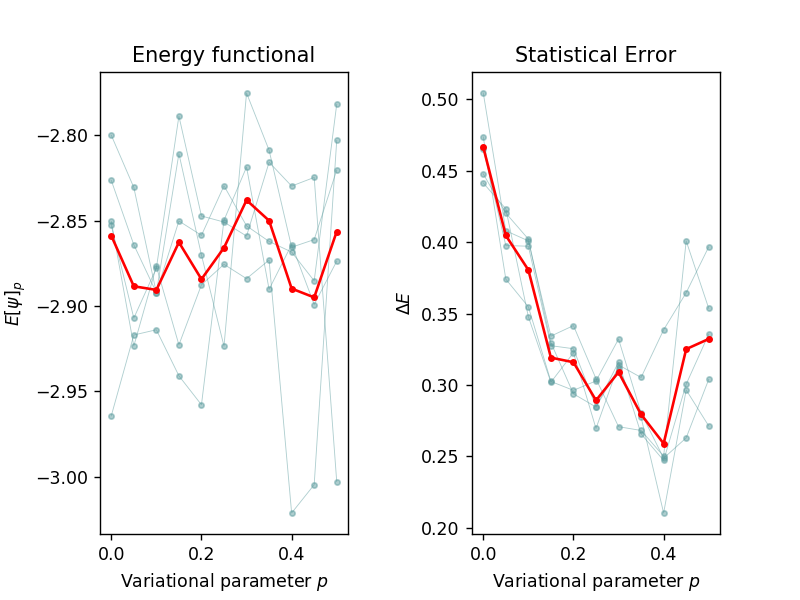

Saving DS plot in 'Outpu/DS_results.png'


<IPython.core.display.Javascript object>


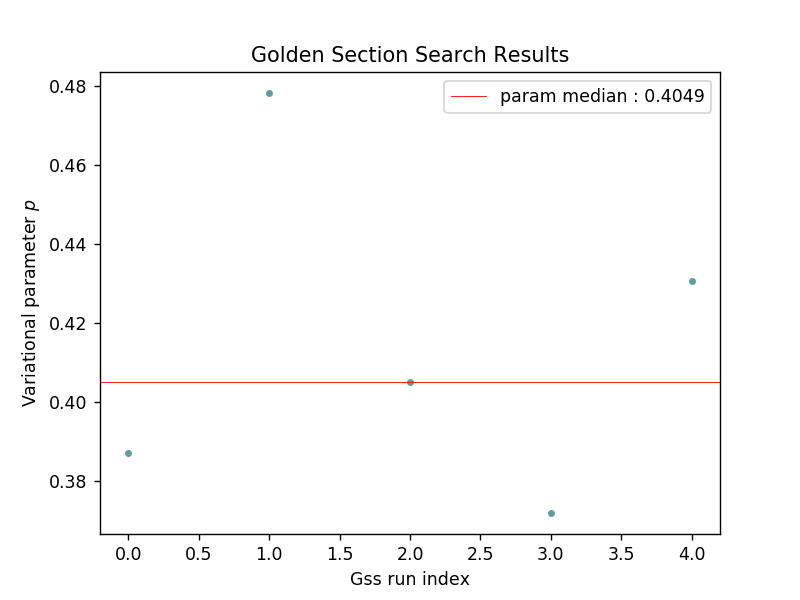

Saving GSS plot in 'Output/GSS_results.png'


<IPython.core.display.Javascript object>


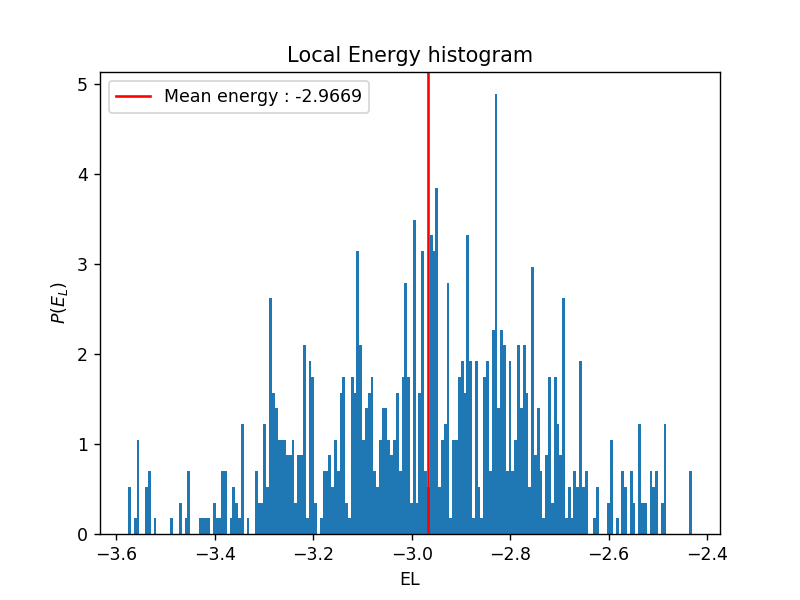

Saving EL histogram in 'Output/EL_hist.png'


In [6]:
#graphics 
%matplotlib notebook
#Direct search plots
fig, ax = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.5)

_ = ax[0].set_title('Energy functional')
_ = ax[0].set_xlabel(r'Variational parameter $p$')
_ = ax[0].set_ylabel(r'$E[\psi]_p$')

_ = ax[1].set_title('Statistical Error')
_ = ax[1].set_xlabel('Variational parameter $p$')
_ = ax[1].set_ylabel(r'$\Delta E$')

params = np.linspace(param_min, param_max, param_values)
for i in range(n_ds): 
    _ = ax[0].plot(params, ds_energies[i,:], marker='.',
                       alpha=0.5, color='cadetblue', lw=0.5)
    _ = ax[1].plot(params, ds_errors[i,:], marker='.', 
                       alpha=0.5, color='cadetblue', lw=0.5)
    
ax[0].plot(params, avg_ds_energies, c='r', marker='.', label='Average values')
ax[1].plot(params, avg_ds_errors, c='r',marker='.', label='Average values')
fig.savefig('Output/DS_results.png')
print("Saving DS plot in 'Outpu/DS_results.png'")

# Golden section search plots 
fig2, ax2 = plt.subplots()

_ = ax2.set_title('Golden Section Search Results')
_ = ax2.set_xlabel('Gss run index')
_ = ax2.set_ylabel(r'Variational parameter $p$')

_ = ax2.plot(range(n_gs), best_param, color='cadetblue', 
             marker='.', linestyle='none')
_ = ax2.axhline(y=np.median(best_param), label='param median : %5.4f' % np.median(best_param),
                color='r', lw=0.5)
_ = ax2.legend()
fig2.savefig('Output/GSS_results.png')
print("Saving GSS plot in 'Output/GSS_results.png'")

#Local Energy histogram
fig3, ax3 = plt.subplots()
_ = ax3.set_title('Local Energy histogram')
_ = ax3.set_xlabel('EL')
_ = ax3.set_ylabel(r'$P(E_L)$')
_ = ax3.hist(energies, bins=200, density=True)
_ = ax3.axvline(x = np.mean(energies), color='r', label = 'Mean energy : %5.4f' % np.mean(energies))
_ = ax3.legend()
fig3.savefig('Output/EL_hist.png')
print("Saving EL histogram in 'Output/EL_hist.png'")

## Implementation - Task A 

The optimization procedure is performed for the wavefunction given by 
$$\psi(r_1,r_2;Z) = exp(-Z r_1) exp(-Z r_2).$$
The case of **non interacting potential** is initially considered to evaluate the goodness of the algorithm and compare the numeric results to the analytical ones.
The Fig([1](#results_non_int)) shown the result of the computation given the following input parameters.

```
## Helium properties 
interacting           jastrow               numeric
0                     0                     0 

## Metropolis parameters 
steps                 d 
10000                 1.1

##Error analysis parameters
method                samples
0                     1000

##Minimum implementation 
b_or_z       low_bound      up_bound      param_samples
0            1.5             2.5           11

## Direct search points 
n_ds 
10 

#Golden Section search parameters
n_gs          tol                maxit
10            1e-4                50

#seed for random number generator
42 

#output chain step frequency 
100

#final evaluate energy runs
n_ev
10


<a id = 'results_non_int' ></a>
<table>
<caption >
Fig.1 - Results of the minimization procedure for the non interacting potential. 
</caption>
<tbody>
<tr>
<td><img src="Rel_Images/Output_non_int/DS_results.png" width="1000"></td>
<td><img src="Rel_Images/Output_non_int/GSS_results.png" width="1000"></td>
</tr>
</tbody>
</table>

The program takes about $t_1 \simeq 400 s$ to compute the direct search with the chosen input parameters and another $t_2 \simeq 600 s$ to conclude the golden section searches. Each `evaluate_energy` call takes about $t_E \simeq 5s$.  
By observing Fig([1](#results_non_int)) it can be noticed that, as the direct search samples the parameter space on $Z = 2$, the minimum of the energy functional is already visible in the DS plot. However, this examples is useful to study how the script behaves when evaluating the best variational parameter with the golden section search runs.\
Moreover it can be seen that for this configuration statistical noise is practically absent in the region near the minimum.

For this case the algorithm returns a parameter $Z^{num} = 2.0026$ and an energy value of :
$$E^{num} = -4.000 \pm 0.004 eV.$$
The acceptance ratio of the metropolis for the last run is given by $a_c = 0.5498$.
Due to statistical uncertainty the energy value is compatible with the theoretical one and there is a good accordance between the variational parameter determined by the algorithm and the expected one as the relative error on parameter Z is $e_{r} \simeq 0.001$.\
Notice how the median allows to reduce the effect of outliers when determining the best value for the variational parameter Z.

Then the case of non interacting potential is considered, where the expected value for Z is given by $Z = 27/16$ and the value of the energy functional should be given by $E = -2.8477$.\
Input parameters are left unchanged, except for `interacting = 1` , `d = 1.2` , `low_bound = 1.2865` and `upper_bound = 2.2865`. This choice of boundaries allows to evaluate the functional on $Z = 27/16 = 1.6875$ that is the parameter expected to minimize the functional.\
Program results for the selected parameters are shown in Fig([2](#results_int))

<a id = 'results_int'></a> 
<table>
<caption >
Fig. 2 - Results of the minimization procedure for the interacting potential. 
</caption>
<tbody>
<tr>
<td><img src="Rel_Images/Output_int/DS_results.png" width="1000"></td>
<td><img src="Rel_Images/Output_int/GSS_results.png" width="1000"></td>
</tr>
</tbody>
</table>

Again, as the exact value of the parameter is sampled by the direct search the minimum is visible in the DS plot. However, in this case, statistical noise can not be neglected, as the minimum appear with a certain width : this shows that it is important to perform the direct search many times such that a pattern can emerge out of the noise. It is also observed for this choice of parameters that the minimum of the statistical error (here assumed to be the standard deviation of the mean energies distribution) falls not on $Z = 1.6875$ but on $Z = 1.7875$, so that the golden search is performed in the interval $[1.5875,1.8875]$.

The best variational parameter returned is $Z^{num}=1.7208$ determining an energy of 
$$E = -2.84 \pm 0.33 eV.$$
While the variational parameter value is not exactly the one obtained analytically, the energy value is consistent with the theoretical one, also due to statistical uncertainty that brings a relative error on the energy $e^{EN}_{r} \simeq 0.1$, while the error on the variational parameter value with respect to the analytical one is $e^{Z}_{r} = 0.02$.\
This can be taken to be a rough estimate of the algorithm accuracy.

## Implementation - Task B

In the second task the Padè-Jastrow wavefunction is used to evaluate the energy functional: 
$$\psi(\boldsymbol{r};b)_{Z=2; a=0.5} = exp(-Z r_1)exp(- Z r_2)exp\Bigg( \frac{a r_{12}}{1 + b r_{12}}\Bigg).$$

The variational parameter $b$ is varied in the interval $[0,0.5]$ to minimize the energy functional. In this case, as the value of $b$ is not known in advance $n_{ds} = 20$ direct searches and $n_{gs} = 20$ golden section searches are performed, while the initial direct searches in parameter spaces takes place by sampling 21 points within $b=0$ and $b=0.5$, boundaries included.  

<a id = 'results_jastrow'></a>
<table>
<caption >
Fig. 3 - Results of the minimization procedure for the Padé-Jastrow trial wavefunction, using the method split for statistical analysis. 
</caption>
<tbody>
<tr>
<td><img src="Rel_Images/Output_jastrow_split/DS_results.png" width="500"></td>
<td><img src="Rel_Images/Output_jastrow_split/GSS_results.png" width="500"></td>
</tr>
</tbody>
</table>

From the DS plot it can be seen that the minimum of the functional should consistently fall within the interval $[0.1,0.3]$.
For the given input parameters the program returns a value of $b^{num} = 0.1839$, that is associated to an energy 
$$E^{num} = - 2.88 \pm 0.13 (eV).$$
The energy returned is smaller than the previous one, obtained with the simpler trial wavefunction. This shows that the Padé-Jastrow wavefunction constitues a better approximation of the Helium electronic ground state.

To compare the results of different statistical analysis, the computation is then repeated using the method `bootstrap` in the `evaluate_energy` calls, giving the following results :
$$b^{num}_{bootstrap} = 0.2500$$
$$E^{num}_{bootstrap} = - 2.8762 \pm 0.0036 (eV)$$

<table>
<caption>
Fig.4 - Results of the minimization procedure for the Padé-Jastrow trial wavefunction. Bootstrap method is used for statistical     analysis. In this case the median is deeply influenced by having more then tun value converging to approximately the same value.
</caption>
<tbody>
    <td><img src='Rel_Images/Output_jastrow_bootstrap/DS_results.png' width='500'></td>
    <td><img src='Rel_Images/Output_jastrow_bootstrap/GSS_results.png' width='500'></td>
</tbody>
</table>

The value of the energy computed in the two procedures are consistent with each other due to the statistical error associated to $E^{num}_{split}$. The two values of $b$ are however compatible only assuming a relative error of $e_r \simeq 0.3$ on the value of $b$ returned by the split procedure. The problem here is that the bootstrap procedure, while introducing a smaller error, sees the minimum of the functional uncertainty in  a different position with respect to the minimum of the energy functional.

To avoid compatibility issues between different program runs the best value of the functional is taken to be 

$$E^{num} = - 2.88 \pm 0.13 (eV),$$

and the best value for the variational parameter is taken as 

$$b = 0.1839.$$

The relative error on the functional is $e_r \simeq 0.05$, while the average acceptance ratio when using the split method is $a_c = 0.4684.$

An idea to reduce the uncertainty is to use the `split` method to determine the best variational parameter, and then use the `bootstrap` method only to determine the energy functional and its uncertainty.

In [7]:
if __name__ == '__main__':
    from HeVMC import *
    import numpy as np 
    
    np.random.seed(42)
    n_ev = 10
    
    He_args = {
        'Z' : 2.,
        'b' : 0.1839,
        'interacting' : True,
        'jastrow' : True,
    }
    
    He = Helium(**He_args)
    
    en = np.empty(n_ev)
    en_err = np.empty(n_ev)
    ac = np.empty(n_ev)
    for i in range(n_ev):
        en[i], en_err[i], ac[i] = evaluate_energy(He.weight, He.EL, He.coords, method='bootstrap', d=1.6)
    
    print('Energy value computed by the bootstrap \n')
    print('%5.4f +- %5.4f eV' % (np.mean(en),np.mean(en_err)))
    print('Acceptance ratio : %5.4f' % np.mean(ac_ratio))

Energy value computed by the bootstrap 

-2.8777 +- 0.0039 eV
Acceptance ratio : 0.4704


Local energy distributions for the various runs are shown in Fig([5](#EL_histograms)) for task A results and Fig([6](#EL_jastrow_histograms)) for task B results.

<a id = 'EL_histograms' ></a>
<table>
<caption>
Fig.5 - Local Energy distribution for the two situations described in task A, respectively neglecting the interaction term (on the left) and considering the interaction term (on the right).
</caption>
<tbody>
    <td><img src='Rel_Images/Output_non_int/EL_hist.png' width='500'></td>
    <td><img src='Rel_Images/Output_int/EL_hist.png' width='500'></td>
</tbody>
</table>

<!-- <a id = 'EL_jastrow_histograms' ></a> -->
<table>
<caption>
Fig.5 - Local Energy distribution for the two situations described in task B, respectively using the `split` method (on the left) or the `bootstrap` method(on the right). It can be seen here that the bootstrap method produces a local energy distribution with a smaller tail towards the most negative energies, resulting in a higher mean value of the distribution. 
</caption>
<tbody>
    <td><img src='Rel_Images/Output_jastrow_split/EL_hist.png' width='500'></td>
    <td><img src='Rel_Images/Output_jastrow_bootstrap/EL_hist.png' width='500'></td>
</tbody>
</table>

## Numerical Experiments

In this section a series of numerical experiments are proposed in order to study how input parameters can be tuned to improve calculation results. Functions presented in `HeVMC` module are also used to study relevant properties of the Helium system proposed and to evaluate the differences between calling different methods (`bootstrap` or `split`) or different implementation (analytic computation of local energy or numeric computation by evaluating the laplacian with finite differences formula).

If the reader is using a Jupyter Notebook, each experiment is proposed in an isolated IPython cell so that the experiment can be reproduced.\
Helium attributes (`interacting`,`jastrow`,`numeric`) are usually defined within a dictionary, so that the reader may easily change them to test different configurations without having to worry about the other code.\
All experiments proposed in the interactive cells require also a reasonable amount of time to be performed with the chosen parameters, about a minute in the worst case.

### Local Energy Running Average

The default positions for the electrons in the Helium class is set to `p_0 = [1.,1.,1.,-1.,-1.,-1.]`. This is also the point that is passed to `metropolis` as the initial point of the chain.\
To estimate how many steps are needed by the metropolis to equilibrate the chain, the running average of the local energy is studied, considering the evolution of $100$ Markov chains evolving from the same initial point $\boldsymbol{p_0}$.\
Helium local energy $E_L$ is then evaluated on each step of all chains and $E_L$ values are computed on the same step and finally averaged to get a representative value for that step.\
In this implementation the `MarkovChain` method `evolve_chain` allows to overwrite each time the same chain, thus a single `MarkovChain` object is actually needed to perform the calculation, saving memory.\
This experiment takes about $t \simeq 60 s.$

<IPython.core.display.Javascript object>


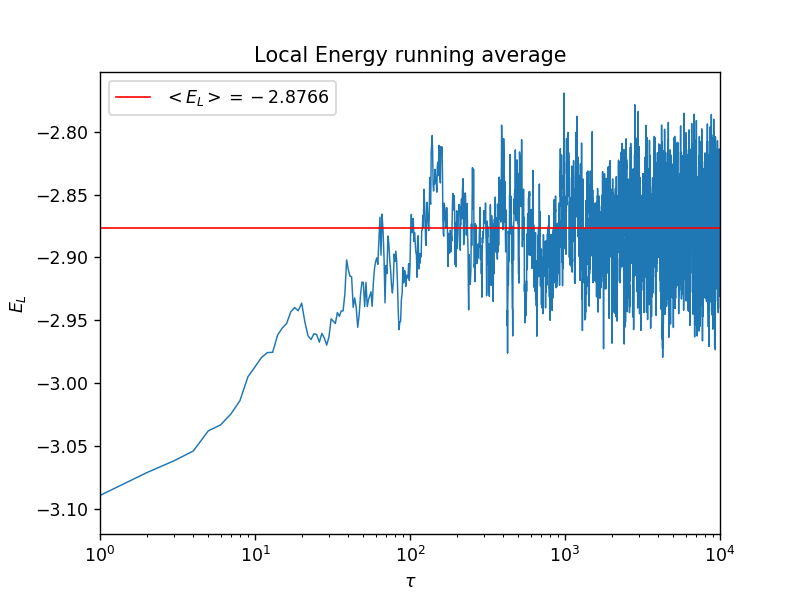

This experiment took 63.9688 s


In [8]:
if __name__ == '__main__':
    from HeVMC import *
    import numpy as np
    import matplotlib.pyplot as plt
    from time import process_time
    %matplotlib notebook 
    
    tic = process_time()
    He_params = {
        'Z' : 2.,
        'b' : 0.2,
        'coords' : [1.,1.,1.,-1.,-1.,-1.],
        'interacting' : True,
        'jastrow' : True,
        'numeric' : False
    }
    steps = 10000
    n_runs = 100
    
    #defining Helium instance
    He = Helium(**He_params)
    
    #define MarkovChain (same structure for all runs)
    r6 = MarkovChain(He.coords, He.weight, d=1.)
    r6.set_chain(steps=steps)
    
    #define array to store energies
    energies = np.empty((n_runs, steps+1))
    
    for i in range(n_runs): 
        r6.evolve_chain()
        energies[i,:] = He.EL(r6.chain)
    
    avg_energies = np.mean(energies, axis = 0) 
    
    fig, ax = plt.subplots()

    _ = ax.set_title('Local Energy running average')
    _ = ax.set_xlabel(r'$\tau$')
    _ = ax.set_ylabel(r'$E_L$')

    _ = ax.set_xlim(1,steps)
    _ = ax.set_xscale('log')
    _ = ax.plot(range(steps+1), avg_energies, lw=0.85)
    _ = ax.axhline(y = np.mean(avg_energies), c='r', 
                   label=r'$<E_L> = %5.4f $' % np.mean(avg_energies),
                   lw=0.95)
    ax.legend()
    plt.show()
    
    toc = process_time()
    print('This experiment took %5.4f s' % (toc-tic))

When considering the general case with the interaction potential and the Padé-Jastrow trial wavefunction with $b=0.2$ the chain equilibrates after about $10^3 - 10^4$ steps (Fig([7](#EL_run_avg))).\
In this case however it is observed that statistical fluctuations remains significant and the local energy fluctuates with an amplitude $\Delta \simeq 0.5 eV$ around the mean value. This explains why statistical error remains significant even when considering runs of $10^5$ steps.

<a id = 'EL_run_avg'></a>
<table>
<caption>
    Fig. 7 - Results for the local energy running average experiment.
</caption>

<td><img src="Rel_Images/EL_run_avg.png" width=500 align='center'></td>
</table>

### Energy functional value vs number of steps

In this experiment it is studied if the local energy has a dependance on the number of states sampled by `metropolis`. The number of states is given by the input parameter `steps`.\
By default `evaluate_energy` equilibrate the chain using a number `steps` of moves, and then performs an actual run sampling 10 times `steps` states.\
Moreover, as computational times grows at least linearly with the number of steps, it is meaningful to consider different values of `steps` that differ of about a power of 10 one another.\
This experiment with the sugested parameters in the code cell takes about $t \simeq 600 .$

In [ ]:
if __name__ == '__main__':
    #creating Helium instance
    tic = process_time()
    He_params = {
        'Z' : 2.,
        'b' : 0.2,
        'coords' : [1.,1.,1.,-1.,-1.,-1.],
        'interacting' : True,
        'jastrow' : True,
        'numeric' : False
    }
    
    energy_args = {
        'd' : 1.6,
        'method' : 'split'
    }
    
    He = Helium(**He_params)                              
    
    #this may take a while ...
    #
    samples = [100,1000,10000,100000,1000000]
    n_samples = len(samples)
    
    mean_energies = np.empty(n_samples)
    errors = np.empty(n_samples)
    times = np.empty(n_samples)
    
    for i in range(n_samples):
        #definig Markov chain
        toc = process_time()
        mean_energies[i], errors[i], _ = evaluate_energy(He.weight, He.EL, He.coords, steps=samples[i], **energy_args)
        times[i] = process_time() - toc
        
    #graphics 

    plt.close('all')
    fig, ax = plt.subplots(2,1)
    plt.subplots_adjust(hspace=0.5)

    _ = ax[0].set_xlabel('Steps')
    _ = ax[0].set_ylabel(r'$E[\psi]$')
    _ = ax[0].set_xscale('log')
    _ = ax[0].errorbar(np.array(samples)*10, mean_energies,errors, marker='o', lw=0.75)
    
    _ = ax[1].set_xlabel('Steps')
    _ = ax[1].set_ylabel('Computational time (s)')
    _ = ax[1].set_xscale('log')
    _ = ax[1].set_yscale('log')
    _ = ax[1].plot(np.array(samples)*10, times, marker='o', lw=0.75)
    
    plt.plot()
    toc = process_time()
    print('This experiment took %5.4f s' % (toc-tic))

<a id = 'EL_vs_steps'></a>
<table>
<caption>Fig. 8 - Dependence of the energy functional value on the number of steps passed as input. Time costs are also plotted as a function of the `steps` input parameter, showing an exponential growth.</caption>
<td><img src='./Rel_Images/EL_vs_steps.png' width=500 align='center'></td>
</table>

The experiments shows that for a large number of steps the uncertainty drops down and the value of the energy functional seems to equilibrate around a definite value.\
When a number of $10^6 - 10^7$ steps is considered the algorithm gains in stability, but computational costs grows exponentially.

### Acceptance ratio, d and statistical error

Varying the parameter `d` into the metropolis algorithm allows to change the acceptance ratio $a_c$.\
It is important to define which acceptance ratio should be considered in the numeric implementation, as it will determine the 'right' number of moves that `metropolis` should generally accepts as new states of the chain.\
Initially it is studied the relation between $d$ and $a_c$, based upon the consideration that increasing the interval half width $d$ for the virtual displacements in `metropolis` should take more states in less likely configurations, reducing the acceptance ratio value (Fig([9](#ac_d_fig))).\
This is done by defining an array of $d$ values and calling `evaluate_energy` for each $d$.\
At each call statistical errors are also computed to see if there is a relation between the parameter $d$ and the statistical error introduced by the program.\
With the parameters given below this experiment tooks about $t \simeq 400 s$.

In [ ]:
if __name__ == '__main__':
    from HeVMC import *
    import numpy as np
    import matplotlib.pyplot as plt
    from time import process_time
    %matplotlib notebook 
    
    tic = process_time()
    d = np.linspace(0.1,6.1,61)
    ac_ratios = np.empty(len(d))
    errors = np.empty(len(d))
    
    He_params = {
        'Z' : 2.,
        'b' : 0.2,
        'coords' : [1.,1.,1.,-1.,-1.,-1.],
        'interacting' : True,
        'jastrow' : True,
        'numeric' : False
    }
    
    He = Helium(**He_params)
    
    for i in range(len(d)):
        _, errors[i], ac_ratios[i] = evaluate_energy(He.weight, He.EL, He.coords, d=d[i],
                                                     method='split')
    
    min_err_idx = np.argmin(errors)
    
    fig, ax = plt.subplots(1,2)
    plt.subplots_adjust(wspace=0.5)

    _ = ax[0].plot(d, ac_ratios, marker='.', lw=0.75, color='cadetblue', alpha=0.5)
    _ = ax[0].plot(d[min_err_idx], ac_ratios[min_err_idx], marker='o', color='red',
                   label = r'$a_c = %5.4f$' % ac_ratios[min_err_idx])
    _ = ax[0].axvline(x=d[min_err_idx], color='coral', lw=0.5,
                      label=r'$d = %5.4f$' % d[min_err_idx])
    _ = ax[0].set_xlabel(r'$d$')
    _ = ax[0].set_ylabel('Acceptance ratio')
    _ = ax[0].legend()
    
    _ = ax[1].plot(d, errors, color='cadetblue', marker='.')
    _ = ax[1].plot(d[min_err_idx], errors[min_err_idx], marker='o', color='red',
                  label = r'$Min Error : %5.4f$' % errors[min_err_idx])
    _ = ax[1].set_xlabel(r'$d$')
    _ = ax[1].set_ylabel('Error')
    _ = ax[1].legend()
    plt.show()
    
    toc = process_time()
    print('This experiment took %5.4f s' % (toc-tic))

The experiment shows that, as expected, $a_c$ decreases as $d$ increases. For the Padé-Jastrow trial wavefunction $a_c < 0.5$  when $d > 1.3$.\
Moreover if `split` method is chosen when calling `evaluate_energy`, there is also a value of $d$ (and thus a value of $a_c$) for which the error shows a minimum. This result is useful when choosing `split` as the method input parameter, as it allows to tune the value of $d$ so that the statistical error can be minimized.\
Repeating the experiment in the various configurations gives the following results :

<a id = 'table:d_ac'></a>
<caption>Table 1 - Optimal d parameters and optimal acceptance ratios computed for the different configurations.</caption>

|`interacting`|`jastrow`|$d$|$a_c$|
|:-:|:-:|:-:|:-:|
| 0 | 0 | 1.1 | 0.6217 |
| 1 | 0 | 1.2 | 0.5972 |
| 0 | 1 | 1.1 | 0.5888 |
| 1 | 1 | 1.6 | 0.4638 |

In these experiments the Helium parameters are chosen such that if `jastrow == True` then $b = 0.2$ and $Z = 2$, otherwise $Z = 1.6$ and $b = 0$.\
Table([1](#table:d_ac)) contains the resulting values obtained for $d$ and $a_c$. As the experiment is made by fixing the variational parameters $Z$ and $b$ the resulting $d$ values are not guaranteed to be good in all situations; the table should just be thought to give an hint about the optimal value of $d$ that can be chosen in each configuration.

If the `bootstrap` method is used however the statistical error seems to lose every correlation with the parameter $d$ as a non monotonic relation is obtained. It is evident that for the `bootstrap` method an optimal $d$ cannot be define through this analysis (Fig([10](#ac_d_bs_fig))).

<a id = 'ac_d_fig'></a>
<table>
<caption>Fig. 9 - Acceptance ratio dependence on the parameter d and associated statistical error evaluated with the method split. The error shows a minimum for a given value of d. This result is obtained with the interacting=True and jastrow=True configuration.</caption>
<td><img src = 'Rel_Images/ac_ratio_vs_d.png' align='center' width = 500></td>
</table>

<a id ='ac_d_bs_fig'></a> 
<table>
<caption>Fig. 10 - Acceptance ratio and statistical error dependence on parameter d. The analysis is carried out with the method `bootstrap`. In this case no evident correlation between the statistical error and the parameter d is found.</caption>
<td><img src = 'Rel_Images/ac_ratio_vs_d_bootstrap.png' align='center' width = 500></td>
</table>

### Numeric vs analytic energy

Local Energy $E_L$ can be computed for a generic wavefunction without knowing in advance the analytic formula if the laplacian in is evaluated numerically through finite differences formula :

\begin{equation}
  E_L = -\frac{1}{2} \frac{\nabla ^2\psi(\boldsymbol{r})}{\psi(\boldsymbol{r})} + V(\boldsymbol{r}).
\end{equation}

The numeric implementation is based on the function `LaplacianPsiOverPsi` listed in the following cell code. 

```python 
    def LaplacianPsiOverPsi(coords,WaveFunction):
        lap = np.zeros(len(coords))
        delta=0.0001
        for i in range(0,len(coords)):
            tempVal3 = WaveFunction(coords[i,:])
            for j in range(0,len(coords[0])):
                coords[i,j]=coords[i,j]+delta
                tempVal=WaveFunction(coords[i,:])
                coords[i,j]=coords[i,j]-2*delta
                tempVal2=WaveFunction(coords[i,:])
                coords[i,j]=coords[i,j]+delta
                lap[i] += ((tempVal+tempVal2)-2.0*tempVal3 )/ (delta*delta)
            lap[i] /= tempVal3
        return lap
```

Notice that, as no volume corrections for curvilinear coordinates are considered, this implementation gives consistent results only if an $N$ dimensional system of orthogonal coordinates is considered. In this case, if Helium electrons cartesian coordinates are thought to be $6$ independent values then the numeric laplacian works as the laplacian defined in $\mathbb{R}^6$.\
To estimate the error introduced by this implementation a very particular case can be considered : 
the non-interacting electrons system with the simpler trial wavefunction and a variational parameter $Z=2$.\
For this choice of parameters the analytic local energy gives $E_L = 4 (eV)$ independently of the states sampled, while the numeric one is subject to fluctuations.\
This experiment tooks $t \simeq 5s$.

In [ ]:
if __name__ == '__main__':
    from HeVMC import *
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib notebook 
    from time import process_time
    
    tic = process_time()
    np.random.seed(42)
    steps = 10000
    
    He_params = {
        'Z' : 2.,
        'b' : 0.2,
        'interacting' : True,
        'jastrow' : True
    }
    
    #creating Helium instance
    He = Helium(**He_params)
    
    #creating Markov Chain instance
    r6 = MarkovChain(He.coords, He.weight, d=0.75)
    r6.set_chain(steps=steps)
    #equilibration
    r6.evolve_chain(save=True)
    #actual run
    r6.evolve_chain()
    
    #Evaluate EL numerically and analitically
    EL_num = He.EL(r6.chain)
    He = Helium(**He_params)
    He._numeric = True
    He.reconfig(He._interacting, He._jastrow)
    EL_an  = He.EL(r6.chain)
    
    #graphics
    fig, ax = plt.subplots(2,1, figsize=(6,6))
    plt.subplots_adjust(hspace=0.5)
    x1 = np.percentile(EL_num,[2.5,97.5])
    x2 = np.percentile(EL_an ,[2.5,97.5])
    _ = ax[0].set_xlim(min(x1[0],x2[0]) - 0.05, max(x1[1],x2[1]) + 0.05)
    
    #Local Energy histogram
    _ = ax[0].set_title('Local Energy distribution')
    _ = ax[0].set_xlabel(r'$E$')
    _ = ax[0].set_ylabel(r'$P(E)$')
    _ = ax[0].hist(EL_num, bins=200, density=True, alpha=0.5, label='Numeric')
    _ = ax[0].hist(EL_an , bins=200, density=True, alpha=0.5, label='Analytic')
    _ = ax[0].axvline(x=np.mean(EL_num), alpha=0.8,label=r'$E_{num} = %5.4f$' % np.mean(EL_num), c='b')
    _ = ax[0].axvline(x=np.mean(EL_an), alpha=0.8,label=r'$E_{an} = %5.4f$' % np.mean(EL_an), c='r')
    
    
    n = len(r6.chain)
    #Local Energy run average
    _ = ax[1].set_title('Local Energy Evolution during run')
    _ = ax[1].set_xlabel(r'$\tau$')
    _ = ax[1].set_ylabel(r'$E$')
    _ = ax[1].plot(range(n), EL_num, alpha=0.5, label='Numeric', c='b')
    _ = ax[1].plot(range(n), EL_an, alpha=0.5, label='Analytic', c='r')
    _ = ax[1].axhline(y=np.mean(EL_num), alpha=0.8,label=r'$E_{num} = %5.4f$' % np.mean(EL_num), c='b')
    _ = ax[1].axhline(y=np.mean(EL_an), alpha=0.8,label=r'$E_{an} = %5.4f$' % np.mean(EL_an), c='r')
    ax[0].legend()
    ax[1].legend()
    plt.show()
    
    toc = process_time()
    print('This experiment took %5.4f s' % (toc-tic))

A comparison of the local energies evolutions during the two runs shows that the error introduced on a single evaluation can generally fall on the $4^{th}$ decimal digit, but it would be rare to have this error on many points (Fig([11](#an_vs_num_le_lap))).\
A numeric implementation, while increasing computational costs, would then give acceptable results.\
Notice also that the local energy distributions in this case ($Z=2$, $b=0$), as expected, are given by Dirac deltas and perfectly match between each other.\
Changing the parameters `jastrow` and `interacting` initially defined in the `He_params` dictionary shows a (rather) perfect match in all possible combinations between the $E_L$s distributions and their values evaluated on the same chain ().

<a id = 'an_vs_num_le_lap'></a>
<table>
<caption>Fig. 11 - Comparison of the local energy numeric evaluation vs the analytic formula evaluation for the case of non interacting electrons with no Padé-Jastrow trial wavefunction.</caption>
<td><img src='Rel_Images/num_vs_an_loc_en_lap.png' width=500 align='center'></td>
</table>

<a id = 'an_vs_num_le'></a>
<table>
<caption>Fig. 12 - Comparison of the local energy numeric evaluation vs the analytic formula evaluation for the case of interacting electrons with the Padé-Jastrow trial wavefunction. A rather perfect match is observed between both the energy values evaluated during the run and the local energies distributions.</caption>
<td><img src='Rel_Images/num_vs_an_loc_en.png' width=500 align='center'></td>
</table>

### Bootstrap vs split

In this experiment the results of statistical analysis produced by `bootstrap` and `split` methods are compared.\
As the **bootstrap** analysis is based on resampling the same chain, it generally produces a bootstrap replicates distribution that is sharp around the mean value. It is interesting to study how much the distribution of mean values generated by a **bootstrap** procedure differs from an implementation based on splitting the Markov Chain of sampled to states.\
This experiment takes about $t \simeq 90 s$.

In [ ]:
if __name__ == '__main__':
    from HeVMC import *
    import numpy as np 
    import matplotlib.pyplot as plt
    %matplotlib notebook
    from time import process_time
    
    tic = process_time()
    np.random.seed(42)
    #steps for metropolis
    steps = 100000
    
    d = 1.6
    samples = 1000
    
    He_args = {
        'Z' : 2.,
        'b' : 0.15,
        'interacting' : True,
        'jastrow' : True,
        'numeric' : False
    }
    
    He = Helium(**He_args)
    
    r6 = MarkovChain(He.coords, He.weight, d)
    r6.set_chain(steps)
    
    r6.evolve_chain(save=True)
    r6.set_chain(10*steps)
    r6.evolve_chain()
    
    energies = He.EL(r6.chain)
    
    #bootstrap replicates
    mean_bs_energies = np.empty(samples)
    for i in range(samples):
        mean_bs_energies[i] = bootstrap_rep(energies, np.mean)
    #Taking the mean of the average energies
    best_bs_energy = np.mean(mean_bs_energies)
    percs = np.percentile(mean_bs_energies, [2.5,97.5])
        
    #stats distribution 
    best_st_energy, err_st_energy, mean_st_energies = make_stats(energies, samples, array=True)
    
    print('Err bootstrap / Err split : %5.4e' % (np.abs(percs[1]-percs[0])/err_st_energy))
    
    fig, ax = plt.subplots(1,2)
    plt.subplots_adjust(wspace=0.5)
    
    _ = ax[0].set_xlabel(r'E')
    _ = ax[0].set_ylabel(r'P(E)')
    _ = ax[0].hist(mean_bs_energies, bins=20, density=True, color='cadetblue', 
                alpha=0.5)
    _ = ax[0].axvline(x=best_bs_energy, color='cadetblue', lw=0.5,
                   label = r'$<E_{bootstrap}$> = %5.4f' % best_bs_energy)
    
    _ = ax[1].set_xlabel(r'E')
    _ = ax[1].set_ylabel(r'P(E)')
    _ = ax[1].hist(mean_st_energies, bins=20, density=True, color='coral',
                alpha=0.5)
    _ = ax[1].axvline(x=best_st_energy, color='coral', lw=0.5, 
                   label = r'$<E_{stat}$> = %5.4f' % best_st_energy )
    ax[0].legend()
    ax[1].legend()
    plt.show()
    
    toc = process_time()
    print('This experiment took %5.4f s' % (toc-tic))

<a id = 'bs_vs_split'></a>
<table>
<caption> Fig. 13 - Comparison between the bbotstrap and split methods for the mean energy distribution. By a cereful look at the horizontal axis it can be seen that  the bootstrap distribution looks like a Dirac delta distribution if compared to the split one (histograms are actually normalized). 
</caption>
<td><img src='Rel_Images/bs_vs_stats.png' width=500 align='center'></td>
</table>

This experiment shows that, while the two procedures gives the same mean average value for the mean values distributions, the bootstrapped distribution is extremely narrowed compared to the split distribution.\
While a bootstrap implementation could lead to more accurate results it is also true that statistical fluctuations may lead the program to find an energy value that is not compatible with the expected one due to a too small uncertainty.

### Wavefunctions 3D plot

As the system wavefunction depends on the two electrons coordinates an intuitive way to show the electrons distributions around the nucleus is to generate a **scatter plot** with the electrons position sampled by the metropolis algorithm. The resulting "electronic cloud" would show the absolute square of the wavefunction, where darker regions are associated to a higher probability of finding the electron there (Fig([14](#3d_plot))).\
The graphic implementation is done by considering the `Axes3D` object from the `mpl_toolkits.mplot3d` python package, while the chain evolution is implemented with a MarkovChain object.\
This experiment takes about $t \simeq 5s$.

In [ ]:
if __name__ == '__main__':
    from HeVMC import *
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from time import process_time
    %matplotlib notebook
    
    tic = process_time()
    #creating Helium instance
    He_args = {
        'Z' : 2.,
        'b' : 0.2,
        'interacting' : True,
        'jastrow' : True,
        'numeric' : False
    }
    
    He = Helium(**He_args)                               
    
    #definig Markov chain
    r6 = MarkovChain(He.coords, prob_dist = He.weight, d = 1.6) #Markov Chain instance
    r6.set_chain(steps=100000)              
    r6.evolve_chain(save=True)
    r6.set_chain(10000)
    r6.evolve_chain()
    
    #3D graphics
    fig = plt.figure()
    #ax = fig.add_subplot(projection = '3d')
    ax1 = Axes3D(fig)

    x1 = r6.chain[:,0]
    y1 = r6.chain[:,1]
    z1 = r6.chain[:,2]

    x2 = r6.chain[:,3]
    y2 = r6.chain[:,4]
    z2 = r6.chain[:,5]

    _ = ax1.set_title('Electrons probability distribution')
    _ = ax1.set_xlabel(r'$x$')
    _ = ax1.set_ylabel(r'$y$')
    _ = ax1.set_zlabel(r'$z$')
    _ = ax1.plot([0.],[0.],[0.], marker='.', color='r')
    _ = ax1.plot(x1, y1, z1, marker='.', linestyle='none', alpha=0.05)
    _ = ax1.plot(x2, y2, z2, marker='.', linestyle='none', alpha=0.05)
    plt.show()
    
    toc = process_time()
    print('This experiment took %5.4f s' % (toc-tic))

<a id ='3d_plot'></a>
<table>
<caption>Fig. 14 - 3D scatter plor of the Helium ground state wavefunction. The two electrons positions are plotted with different colors to show that the distribution are actually symmetric under particles exchange.</caption>

<td><img src='Rel_Images/3D_wf.png' width=500 align='center'></td>
</table>

The final plot, done for a configuration of $Z = 2$, $b=0.2$ and the Padé-Jastrow wavefunction, shows the two electrons positions with different colors. This choice is made to show that, as expected by this system whose wavefunctions are symmetric under particle exchange, there is no evident difference between the two electrons distributions. 

### Time evolutions of electrons distances distributions

All the trial wavefunctions considered are symmetric under particles exchange. This suggests that the electron distances distributions should converge over time to the same distribution. The aim of this experiment is to verify this statement.\
This is done by considering the evolution of $500$ chains, saving the electrons coordinates for each step and saving each chain in a list.  
After that the distances of the electrons from the nucleus are evaluated every $10$ steps on each chain and saved on  a 2D array, whose rows label which step is considered and whose columns give the value of the distance evaluated for each chain. Each row would then give a distribution of distances, allowing to plot an histogram of the distances distributions each time.\
The obtained results are shown as an animated `gif` obtained by subsequently adding all the histograms obtained.\
The relative distance between electrons is also evaluated, so that it can be studied how far apart in mean they are from each other.\
This experiment takes $t \simeq 40s$.

In [ ]:
if __name__ == '__main__':
    import matplotlib.animation as animation
    from HeVMC import *
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from time import process_time
    %matplotlib notebook
    
    tic = process_time()
    
    np.random.seed(42)
    He_params = {
        'Z' : 2.,
        'b' : 0.2,
        'coords' : [1.,1.,1.,-2.,-2.,-2.],
        'interacting' : True,
        'jastrow' : True,
        'numeric' : False
    }
    
    He = Helium(**He_params)
    n_runs = 500
    steps = 1000
    chains_ls = []
    
    r6 = MarkovChain(He.coords, He.weight, d=1.6)
    r6.set_chain(steps)
    
    for i in range(n_runs):
        r6.evolve_chain()
        chains_ls.append(r6.chain)
    
    
    r1 = np.empty((100, n_runs))
    r2 = np.empty((100, n_runs))
    r12 = np.empty((100, n_runs))
    for idx, i in enumerate(range(0,steps,10)):
        r1[idx] = [np.linalg.norm(chains_ls[j][i,:3]) for j in range(len(chains_ls))]
        r2[idx] = [np.linalg.norm(chains_ls[j][i,3:]) for j in range(len(chains_ls))]
        r12[idx] = [np.linalg.norm(np.array(chains_ls[j][i,:3])-np.array(chains_ls[j][i,3:])) for j in range(len(chains_ls))]
    
    #gif 
    import matplotlib.animation as animation

    fig, ax = plt.subplots()
    line, = ax.plot([], [])

    def init(): 
        # creating an empty plot/frame 
        line.set_data([], []) 
        return line,

    def animate(i):
        r1m = np.mean(r1[i])
        r2m = np.mean(r2[i])
        r12m = np.mean(r12[i])
        _ = ax.clear()
        _ = ax.set_xlim(0.,4.)
        _ = ax.set_ylim(0.,1.3)
        _ = ax.set_xlabel(r'$r$')
        _ = ax.set_ylabel(r'$P(r)$')
        _ = ax.hist(r1[i], bins=50, density=True, alpha=0.6, color='cadetblue')
        _ = ax.hist(r2[i], bins=50, density=True, alpha=0.6, color='coral')
        _ = ax.hist(r12[i],bins=50, density=True, alpha=0.4, color='green')
        _ = ax.axvline(x=r1m, color='cadetblue', lw=0.75, label=r'$<r_1> = %5.4f$' % r1m)
        _ = ax.axvline(x=r2m, color='coral', lw=0.75, label=r'$<r_2> = %5.4f$' % r2m)
        _ = ax.axvline(x=r12m, color='green', lw=0.75, label=r'$<r_{12}> = %5.4f$' % r12m)
        _ = ax.text(3.,0.9,r'$\tau = %d$' % (10*(i+1)))
        ax.legend()
        return line,

    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, 
                                   interval=250, blit=True)
    anim.save('electrons_distances.gif',writer='pillow') 
    toc = process_time()
    print('This experiment took %5.4f s' % (toc-tic))

<a id = 'e_gif' ></a>
<table>
<caption>
Fig.15 - Electron distances evolutions, respectively for the `interacting = True` and `jastrow = True` configuration (left) and for the `interacting = False` and `jastrow = False` configuration (right).
</caption>
<tbody>
    <td><img src='Rel_Images/electrons_distances.gif' width='500'></td>
    <td><img src='Rel_Images/electrons_distances_non_int.gif' width='500'></td>
</tbody>
</table>

The resulting animation shows that the two electrons distances distributions actually converge rapidly to the same distribution.\
Moreover the interelectronic distance distribution has a more consistent tail with respect to the first two distributions, suggesting that the two electrons can be generally found far apart from each other and configurations with the two electrons being in short range are discouraged.\
An interesting result is obtained repeating the experiment whit `interacting = False` and `jastrow = False`, where it is observed that the mean value of the interelectronic distance $r_{12}$ is smaller than in the previous case as expected when the interaction term is neglected. However the mean value of $r_{12}$ does not drop down to $r_{12} = 0$; this effect is only due to statistic, as it is unlikely to find the electrons always in the same position.\
The effect can be roughly estimated by saying that the interelectronic repulsive potential increases the interelectonic distance by $\Delta r_{12} \simeq 0.3 a_0$, with $a_0$ being the Bohr radius.

## Conclusions

Thanks to a Variational Monte Carlo algorithm the evaluation of the multidimensional integral defining the Helium Energy functional is accomplished with reduced computational costs.

The main problem encountered during the implementation of this algorithm is the effect of statistical noise that reduces the stability of the algorithm results.

The numerical experiments exposed show that this effect may be reduced by using the `split` method with a proper choice of the parameter $d$, determining the half width of the virtual displacements in `metropolis` function, and by choosing a greater number of steps for the `evaluate_energy` function.\
A bootstrap statistical analysis is also performed in order to try to reduce statistical uncertainty : on the one hand the bootstrap effectively introduces a smaller statistical error, on the other hand using the bootstrap procedure to resample a greatly fluctuating distribution may not be completely legitimate and could lead to underestimate the error, and thus to obtain numeric results incompatible with the analytic ones.

To ensure more stable results with a not prohibitive time, an algorithm is proposed where the minimization procedure is repeated several times and a representative of the energy functional is chosen as the mean value of the obtained results. 

The obtained results show a good accordance with the analytic ones, even if the tatistical error falls on the first decimal digits, thus determining not too accurate results.

Moreover, in this project the VMC implementation shows all its flexibility, as it allows to evaluate the mean values of other relevant physical observables, such as the electronic distances from the nucleus and the interelectronic distance.

With all these consideration made a last run of the script in the task B configuration is proposed, showing an effective improvement. 
The input parameters here are the same exposed in [Task B] section, with the esception of the parameter `steps = 100000` , `n_gs = n_ds = n_ev = 5` and `param_samples=11`. This run takes about $t \simeq 7000 s$ for the direct search and the golden section search computation, and another $50 s$ for each `evaluate_energy` call.\
The increased number of steps allows to obtain a more accurate result.

$$ b = 0.1407,$$
$$E^{num} = -2.877 \pm 0.044 eV.$$

<a id = 'final_run' ></a>
<table>
<caption>
Fig.16 - Results of the final run of the script with steps = 100000. The obtained results show an effective improvement with respect to the previously obtained ones with runs of 10000 steps.
</caption>
<tbody>
    <td><img src='Rel_Images/Output_last/DS_results.png' width='500'></td>
    <td><img src='Rel_Images/Output_last/GSS_results.png' width='500'></td>
</tbody>
</table>

## Appendix A - HeVMC classes

In this appendix is reported the code that defines the two classes in the `HeVMC.py` module.

<a id = 'Markov'></a> 
<caption>Listing 7 : MarkovChain class code</caption>

```python
class MarkovChain:
    '''Class describing a Markov Chain in phase space,
       starting at init_point and with asymptotic probability 
       distribution given by prob_dist'''
    
    def __init__(self, init_point=np.empty((1,1)), 
                 prob_dist=None, d=0.) :
        self._init_point = init_point     #initial point in phase space 
        self._prob_dist = prob_dist       #asymptotic probability distribution
        self._d = d                       #displacement takes place in [-d,d)
        self.steps = 0                    #Markov chain steps
        self.chain = np.empty(0)          #Store Markov chain entries
        self.acceptance_ratio = 0.       
    
    def set_chain(self, steps):
        if ( len(self._init_point) != 0 ) :
            self.steps = steps
            self.chain = np.empty( (self.steps + 1 , len(self._init_point)) )
            return
        else:
            return
  
    def evolve_chain(self, save=False):
        self.chain, self.acceptance_ratio = metropolis(self.steps,
                                                       self._init_point,
                                                       self._d,
                                                       self._prob_dist)
        if (save == True) : 
            self._init_point = self.chain[-1]

            return
```

The MarkovChain class contains methods that are useful for successive calls of the `metropolis` function on the same system configuration space.

The method **set_chain** initialize a 2D array of values whose rows represent the system state sampled at the i-th step, while its columns represent the j-th generalized coordinate describing the system state.

The method **evolve_chain** calls the `metropolis` function passing as argument the internal parameters stores as the MarkovChain attributes. The optional parameter **save_chain** is thought for the equilibration run, where the last step of the chain is taken as the new initial step for a the actual run whose sample states are used to evaluate physical observables.

The Helium class is one of the core objects in this projects. All information about the Helium system described are stored within the class as attributes, so that they are easily accessible at each moment.

<a id = 'Helium'></a>
<caption> Listing 8: Helium class code </caption>

```python
class Helium:
    
    def __init__(self, Z, b, coords=[1.,1.,1.,-1.,-1.,-1.],
                 interacting=True, jastrow=True, numeric=False):
        self.name = 'Helium'
        self.Z = Z                      #Variational parameters Z and b
        self.b = b
        self.coords = coords
        self._interacting = interacting
        self._jastrow = jastrow
        self._numeric = numeric
        self.set_potential()                 
        self.set_WF()
        self.set_weight()
        self.set_local_energy()
    
        
    def set_potential(self):
        self.V = set_potential_He(self._interacting)
        return
    
    
    def set_WF(self):
        if (self._jastrow == True):
            self.WF = set_pade_jastrow(self.b)
        else:
            self.WF = set_npj_wave_func(self.Z)
        return
    
    
    def set_weight(self):
        def weight(coords):
            w = self.WF(coords)**2.
            return w
        self.weight = weight
        return
    
    
    def set_local_energy(self):
        if self._numeric == True :
            #local energy is determined numerically
            def EL(coords):
                el = - 0.5 * LaplacianPsiOverPsi(coords, self.WF)          
                el += self.V(coords)
                return el
        else : 
            #local energy is determined analytically
            if self._jastrow == False:
                EL = set_local_energy_npj(self.Z, self._interacting)
            else:
                EL = set_loc_en_pj(self.b, self._interacting)
        self.EL = EL
        return
    
    def reconfig(self, interacting, jastrow): 
        self._interacting = interacting
        self._jastrow = jastrow
        self.set_potential()                 
        self.set_WF()
        self.set_weight()
        self.set_local_energy()
        return
```

The class contains a series of methods preceded by `set_` that are used to define the class' attributes. Each method eploits a Python function closure, where an argument is passed to a function that returns another function which is defined with that argument.\
To show how this works the code of the function `set_local_energy_pj` is listed in the cell block below.

<a id = 'set_loc_en_pj'></a>
<caption> Listing 9 : The function `set_loc_en_pj` offers an example of how function closure works in python. Here `b` is a variable defined in the global scope and it is used to define a nested function `loc_en_pj`. This function will then work with the variable `coords` without the need of passing the argument `b` anymore. Here `la` is the alias for numpy.linalg package.
</caption>

```python
def set_loc_en_pj(b, interacting):
    '''Returns Helium local energy evaluated for the Padé-Jastrow
       trial wavefunction. b is the variational parameter, while
       the boolean argument interacting allows to neglect e-e interaction 
       term. Cusp conditions are already considered in this implementation.
    '''
    if interacting == True:
        
        def loc_en_pj(coords):
            '''Return the local energy for the Helium atom, with 
            interacting potential and Padé-Jastrow trial 
            wavefunction. 
            b is the variational parameter'''
            el = np.empty(len(coords))
            for i in range(len(coords)):
                r1_v = np.array(coords[i,:3])
                r2_v = np.array(coords[i,3:])
                r12_v = r1_v - r2_v
                r1 = la.norm(r1_v)
                r2 = la.norm(r2_v)
                r12 = la.norm(r12_v)
    
                Z=2.
                a=0.5
    
                el[i] = -Z**2. + (Z-2.)/r1 + (Z-2.)/r2 +\
                        1./r12 * (1. - 2.*a/((1.+b*r12)**2.) ) +\
                        2.*a*b/((1.+b*r12)**3.) - a**2./((1. + b*r12)**4.) +\
                        Z*a/((1. + b*r12)**2.) * np.dot(r12_v/r12, r1_v/r1 - r2_v/r2)
            return el
    
    else :
        
        def loc_en_pj(coords):
            '''Return the local energy for the Helium atom, with 
            non-interacting potential and Padé-Jastrow trial 
            wavefunction. 
            b is the variational parameter'''
            el = np.empty(len(coords))
            for i in range(len(coords)):
                r1_v = np.array(coords[i,:3])
                r2_v = np.array(coords[i,3:])
                r12_v = r1_v - r2_v
                r1 = la.norm(r1_v)
                r2 = la.norm(r2_v)
                r12 = la.norm(r12_v)
    
                Z=2.
                a=0.5
    
                el[i] = -Z**2. + (Z-2.)/r1 + (Z-2.)/r2 +\
                        1./r12 * (- 2.*a/((1.+b*r12)**2.) ) +\
                        2.*a*b/((1.+b*r12)**3.) - a**2./((1. + b*r12)**4.) +\
                        Z*a/((1. + b*r12)**2.) * np.dot(r12_v/r12, r1_v/r1 - r2_v/r2) 
            return el
    
    return loc_en_pj
```

In this example the function `set_loc_en_pj` (it stands for 'set local energy padé-jastrow') takes as argument the variational parameter $b$ and the boolean parameter `interacting`. The boolean parameter is just used to choose if the interaction potential should be considered or not.

Inside `set_loc_en_pj` there is a nested function `loc_en_pj` which evaluates the local energy functional on a 2D array of coordinates. Here `loc_en_pj` has access to the variable `b` defined in the outer scope to do calculations. The function `set_loc_en_pj` returns eventually the function `loc_en_pj` as an output.

The useful result of using the closure is that `loc_en_pj` is actually a function of the coordinates only, without the need of passing the variational parameter $b$ as argument each time the function is called.\
For a matter of compliteness the situation corresponding to `interacting = False` is treated even for the Padé-Jastrow approximant. The local energy is just the local energy of the Padé-Jastrow trial wavefunction where the interaction term $V_{int} = 1 / r_{12}$ is subtracted. Cusp condition are imposed in the same way as in the interacting case.

## Appendix B - Statistical Analysis functions

The `split` methods implement a statistical analysis based on splitting an array of values into a set of sub-arrays. The mean value of each sub-array is then evaluated and contributes to define a mean values distribution. Then the best value for the array mean value is obtaining as the average of all the mean values (it is literally the mean of the mean values). As it is well known in statistics, if each array is sufficiently long to be considered an independent sample, this procedure decreases the uncertainty of about a factor $\sqrt{N}$, if $N$ is the number of sub-arrays obtained from the initial one.

The code implementation of this procedure, based on `numpy` functions is listed below. 

<a id = 'make_stats'></a>
<caption>Listing 10: `make_stats` function code. The numpy function `array_split` allows to split the given array into a set of subarrays of different length so that errors do not occur when passing a given value of `pieces` as input.</caption> 

```python
def make_stats(chain, pieces, array=False):
    '''Given a chain of data, this is divided into 
    the selected number of subchains. The mean value and the 
    mean value standard deviation are finally returned.
    
    Arguments:
    ----------------
    chain (float, array) : the array to be split into subchains;
    pieces (integer) : the number of subchains wanted;
    array (bool) : if True the values of the mean evaluated on each subchain 
    is returned.
    
    Outputs:
    ---------------
    (float)(float) : returns the average of the mean values distribution
    and its standard deviation.
    '''
    #slice the chain with split
    sub_chains = np.array_split(chain, pieces)
    
    #Evaluate mean values of the sliced pieces 
    means = np.empty(pieces)
    for i in range(pieces):
        means[i] = np.mean(sub_chains[i])
    #return mean value and std deviation
    if array==True:
        return np.mean(means), np.std(means), means 
    else :
        return np.mean(means), np.std(means)
```

The bootstrap analysis is a statistical procedure useful to determine the statistics of a set of sampled values without having to produce new measurements to define statistical error or mean values.\
Bootstrapping means randomly resampling a given set of data with replacement (meaning that a sampled valu can be resampled more than once) to reproduce new sets of data with the same statistical distribution.\
A statistical variable, such as the mean value, can then be evaluated on the bootstrapped distribution. The statistical variable values takes the name of **bootstrap replicates**.\
If the mean value is taken as the bootstrap replicate, the bootstrap procedure usually ensure to find a proper gaussian distribution. On the other hand the quality of this procedure results depends on the quality of the original set of data being resampled. If statistical noise in the data is present the botstrap may be influenced by it leading to inaccurate results.

The code responsible for the bootstrap replicate evaluation is listed below.

<a id ='bootstrap_rep'></a>
<caption>Listing 11 : The 'bootstrap_rep' function is just given by a line of code. The replicate is passed as the input argument `func`, while numpy.random.choice is responsible for the resampling with replacement of the input data.</caption>

```python
def bootstrap_rep(data, func):
    '''Evaluate a bootstrap replicate for a given function.
       
       Arguments:
       --------------
       data (float,array) : array containing the data that must
       be resampled. 
       func (function object) : the replicate is actually the value of the function
       evaluated on the resampled data 
       
       Outputs:
       (float) , returns the replicate evaluated on the resampled data. 
    '''
    return func(rd.choice(data, len(data)))
```